In [ ]:
!pip install --upgrade --quiet gcsfs google-cloud-storage

In [ ]:
%%capture
## Authenticate your Google account to access Google Cloud services. This will allow you to interact with Google Cloud Storage using the credentials associated with your account.
## Also import your Google Drive to access your team's Shared Google Drive as well as Operating System
from google.colab import auth
from google.colab import drive
import os
auth.authenticate_user()
drive.mount('/content/drive', force_remount=True)

## If your team is using a Shared Drive in a Google Workspace (usually through a University Gmail account)
directory_path = '/content/drive/Shared drives/Harvard Datathon 2024/'


In [ ]:
## Initialize the Google Cloud Storage client.
from google.cloud import storage
client = storage.Client(project='HDSI-Agri-Datathon-2024')

In [ ]:
%%capture
## All the data you need will be located in a specific prompt folder located in a Google bucket.
## I have included some code for you all to start exploring file types

bucket_name = 'hdsi-agri-prompt-data'

## Access the specified bucket
bucket = client.bucket(bucket_name)

## List all blobs (files and folders) in the bucket
blobs = list(bucket.list_blobs())

## Initialize variables to count and store folder names and file types
folders = set()
file_types = set()
blob_count = 0

## Loop through all blobs to gather folder names and file types
for blob in blobs:
    blob_name = blob.name

    ## Check if it's a folder (by convention, ends with '/')
    if blob_name.endswith('/'):
        folders.add(blob_name)
    else:
        ## Capture file type
        file_extension = blob_name.split('.')[-1] if '.' in blob_name else 'Unknown'
        file_types.add(file_extension)

    blob_count += 1

## list the folders
print("Folders in the bucket:")
for folder in folders:
    print(f" - {folder}")

## Show the file types of the first 5 files (skip folders)
print("\nFirst 5 file types:")
counter = 0
for blob in blobs:
    if not blob.name.endswith('/') and counter < 5:
        file_name = blob.name
        file_extension = file_name.split('.')[-1] if '.' in file_name else 'Unknown'
        print(f"File name: {file_name}, File type: {file_extension}")
        counter += 1

## Total count of blobs
print(f"\nTotal number of blobs in the bucket: {blob_count}")

## Print the unique file types found
print(f"\nFile types in the bucket: {', '.join(file_types)}")




In [ ]:
%%capture
bucket_name = 'hdsi-agri-prompt-data'

# Access the specified bucket
bucket = client.bucket(bucket_name)

# List all blobs (files and folders) in the bucket
blobs = list(bucket.list_blobs())

# Initialize variables to store folder names and file types
prompt2_files = []
folders = set()
file_types = set()
blob_count = 0

# Loop through all blobs to gather folder names and file types related to Prompt 2
for blob in blobs:
    blob_name = blob.name

    # Filter blobs to only include Prompt 2 files
    if "HDSI_AGRI_Prompt_2/" in blob_name:
        if blob_name.endswith('/'):
            folders.add(blob_name)
        else:
            prompt2_files.append(blob_name)
            # Capture file type
            file_extension = blob_name.split('.')[-1] if '.' in blob_name else 'Unknown'
            file_types.add(file_extension)

        blob_count += 1

# List the folders related to Prompt 2
print("Folders in the bucket related to Prompt 2:")
for folder in folders:
    print(f" - {folder}")

# Show the first 5 files in Prompt 2
print("\nFirst 5 files related to Prompt 2:")
for i, file_name in enumerate(prompt2_files[:5]):
    file_extension = file_name.split('.')[-1] if '.' in file_name else 'Unknown'
    print(f"File name: {file_name}, File type: {file_extension}")

# Total count of Prompt 2 blobs
print(f"\nTotal number of blobs related to Prompt 2: {blob_count}")

# Print the unique file types found in Prompt 2
print(f"\nFile types in Prompt 2: {', '.join(file_types)}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For geospatial analysis
import geopandas as gpd
import plotly.express as px

In [ ]:
%%capture

import pandas as pd
from google.cloud import storage
import io

# Initialize the Google Cloud Storage client.
client = storage.Client(project='HDSI-Agri-Datathon-2024')

bucket_name = 'hdsi-agri-prompt-data'
blob_name = 'HDSI_AGRI_Prompt_2/prompt2_demos_landtotals_county.csv'

# Access the specified bucket and blob
bucket = client.bucket(bucket_name)
blob = bucket.blob(blob_name)

# Download the blob's content as bytes
content = blob.download_as_bytes()

# Load the CSV data from the downloaded content using io.BytesIO
demos_land_totals_county = pd.read_csv(io.BytesIO(content))

# Display the first few rows to inspect the data
print("Demographic and Land Totals by County:")
print(demos_land_totals_county.head())

In [ ]:
%%capture
import pandas as pd
from google.cloud import storage
import io

# Initialize the Google Cloud Storage client
client = storage.Client(project='HDSI-Agri-Datathon-2024')

# Specify the bucket and folder
bucket_name = 'hdsi-agri-prompt-data'
folder_name = 'HDSI_AGRI_Prompt_2/'

# Access the specified bucket
bucket = client.bucket(bucket_name)

# List all blobs (files and folders) within the specified folder
blobs = list(bucket.list_blobs(prefix=folder_name))

# Create a dictionary to store the dataframes
dataframes = {}

# Loop through all files within the folder
for blob in blobs:
    if not blob.name.endswith('/'):  # Skip folders
        file_name = blob.name
        file_extension = file_name.split('.')[-1].lower()

        # Download the blob's content as bytes
        content = blob.download_as_bytes()

        # Read the file based on its extension
        if file_extension == 'csv':
            dataframes[file_name] = pd.read_csv(io.BytesIO(content))
        elif file_extension == 'xlsx':
            dataframes[file_name] = pd.read_excel(io.BytesIO(content))
        # Add more file types and their corresponding read functions if needed

# Now you have all the files from Prompt 2 loaded into the 'dataframes' dictionary
# You can access them using their file names as keys
# For example, to access the dataframe for 'prompt2_demos_landtotals_county.csv':
# df = dataframes['HDSI_AGRI_Prompt_2/prompt2_demos_landtotals_county.csv']

# Print the names of the loaded dataframes
for file_name, df in dataframes.items():
    print(f"Loaded dataframe for: {file_name}")

In [ ]:
%%capture
import pandas as pd
from google.cloud import storage
import io

# Initialize the Google Cloud Storage client
client = storage.Client(project='HDSI-Agri-Datathon-2024')

# Specify the bucket and folder
bucket_name = 'hdsi-agri-prompt-data'
folder_name = 'HDSI_AGRI_Prompt_2/'

# Access the specified bucket
bucket = client.bucket(bucket_name)

# List all blobs (files and folders) within the specified folder
blobs = list(bucket.list_blobs(prefix=folder_name))

# Loop through all files within the folder
for blob in blobs:
    if not blob.name.endswith('/'):  # Skip folders
        file_name = blob.name
        file_extension = file_name.split('.')[-1].lower()

        # Download the blob's content as bytes
        content = blob.download_as_bytes()

        # Read the file based on its extension (only reading a few rows to infer data types)
        if file_extension == 'csv':
            df = pd.read_csv(io.BytesIO(content), nrows=10)
        elif file_extension == 'xlsx':
            df = pd.read_excel(io.BytesIO(content), nrows=10)

        # Print the file name, columns, and their data types
        print(f"File: {file_name}")
        for col in df.columns:
            print(f"  Column: {col}, Data type: {df[col].dtype}")
        print("-" * 20)

In [ ]:
%%capture
import pandas as pd
from google.cloud import storage
import io

# Initialize the Google Cloud Storage client
client = storage.Client(project='HDSI-Agri-Datathon-2024')

# Specify the bucket and folder
bucket_name = 'hdsi-agri-prompt-data'
folder_name = 'HDSI_AGRI_Prompt_2/'

# Access the specified bucket
bucket = client.bucket(bucket_name)

# List all blobs (files and folders) within the specified folder
blobs = list(bucket.list_blobs(prefix=folder_name))

# Create a dictionary to store summarized information for each file
file_summaries = {}

# Loop through all files within the folder
for blob in blobs:
    if not blob.name.endswith('/'):  # Skip folders
        file_name = blob.name
        file_extension = file_name.split('.')[-1].lower()

        # Download the blob's content as bytes
        content = blob.download_as_bytes()

        # Read the file based on its extension (only reading a few rows to infer data types)
        if file_extension == 'csv':
            df = pd.read_csv(io.BytesIO(content), nrows=10)
        elif file_extension == 'xlsx':
            df = pd.read_excel(io.BytesIO(content), nrows=10)

        # Generate a summary for the file
        summary = f"File: {file_name}\n"
        summary += f"  Number of columns: {len(df.columns)}\n"
        summary += f"  Column names: {', '.join(df.columns[:5])} (and {len(df.columns)-5} more)\n"
        summary += f"  Data types: {', '.join([str(df[col].dtype) for col in df.columns[:5]])} (and {len(df.columns)-5} more)\n"

        file_summaries[file_name] = summary

# Print the summarized information for each file
for file_name, summary in file_summaries.items():
    print(summary)
    print("-" * 20)

In [ ]:
# Access the dataframe using its file name as the key
demos_land_totals_county = dataframes['HDSI_AGRI_Prompt_2/prompt2_demos_landtotals_county.csv']
prompt2_sales = dataframes['HDSI_AGRI_Prompt_2/prompt2_prompt3_sales.csv']
sales_data_county = dataframes['HDSI_AGRI_Prompt_2/sales_data_county.csv']

inflation_data = dataframes['HDSI_AGRI_Prompt_2/inflation_GDP_price_index.xlsx']
state_level_data = dataframes['HDSI_AGRI_Prompt_2/state_level_2002_2007_2012_2017_2022.xlsx']

In [ ]:
%%capture
import pandas as pd
from google.cloud import storage
import io

# Initialize the Google Cloud Storage client
client = storage.Client(project='HDSI-Agri-Datathon-2024')

# Specify the bucket and folder
bucket_name = 'hdsi-agri-prompt-data'
folder_name = 'HDSI_AGRI_Prompt_2/'

# Access the specified bucket
bucket = client.bucket(bucket_name)

# List all blobs (files and folders) within the specified folder
blobs = list(bucket.list_blobs(prefix=folder_name))

# Create a dictionary to store the dataframes
dataframes = {}

# Loop through all files within the folder
for blob in blobs:
    if not blob.name.endswith('/'):  # Skip folders
        file_name = blob.name
        file_extension = file_name.split('.')[-1].lower()

        # Download the blob's content as bytes
        content = blob.download_as_bytes()

        # Read the file based on its extension
        if file_extension == 'csv':
            dataframes[file_name] = pd.read_csv(io.BytesIO(content))
        elif file_extension == 'xlsx':
            dataframes[file_name] = pd.read_excel(io.BytesIO(content))

# Access the dataframes using their file names as keys
demos_land_totals_county = dataframes['HDSI_AGRI_Prompt_2/prompt2_demos_landtotals_county.csv']
prompt2_sales = dataframes['HDSI_AGRI_Prompt_2/prompt2_prompt3_sales.csv'] # Changed variable name here
sales_data_county = dataframes['HDSI_AGRI_Prompt_2/sales_data_county.csv']
inflation_data = dataframes['HDSI_AGRI_Prompt_2/inflation_GDP_price_index.xlsx']
state_level_data = dataframes['HDSI_AGRI_Prompt_2/state_level_2002_2007_2012_2017_2022.xlsx']

# Function to clean a dataframe
def clean_dataframe(df):
    # Remove rows with missing values in all columns
    df.dropna(how='all', inplace=True)

    # Remove duplicate rows
    df.drop_duplicates(inplace=True)

    # Remove leading/trailing whitespaces from column names
    df.columns = df.columns.str.strip()

    # Convert column names to lowercase
    df.columns = df.columns.str.lower()

    return df

# Clean all dataframes
demos_land_totals_county = clean_dataframe(demos_land_totals_county)
prompt2_sales = clean_dataframe(prompt2_sales) # Changed variable name here
sales_data_county = clean_dataframe(sales_data_county)
inflation_data = clean_dataframe(inflation_data)
state_level_data = clean_dataframe(state_level_data)

In [ ]:
%%capture
# County-level demographics and land totals
print("\nCounty-Level Demographics and Land Totals:")
print(demos_land_totals_county.info())
print(demos_land_totals_county.head())

# Crop sales
print("\nPrompt 3 Sales Data:")
print(prompt2_sales.info())
print(prompt2_sales.head())

# County-level sales data
print("\nCounty-Level Sales Data:")
print(sales_data_county.info())
print(sales_data_county.head())

# Inflation data
print("\nInflation Data:")
print(inflation_data.info())
print(inflation_data.head())

# State-level data
print("\nState-Level Data:")
print(state_level_data.info())
print(state_level_data.head())

In [ ]:
%%capture
print("\nSummary Statistics of Demographics and Land Totals:")
print(demos_land_totals_county.describe())

print("\nSummary Statistics of Prompt 3 Sales Data:")
print(prompt2_sales.describe())

print("\nSummary Statistics of County-Level Sales Data:")
print(sales_data_county.describe())


In [ ]:
%%capture
import pandas as pd
from google.cloud import storage
import io

# Initialize the Google Cloud Storage client
client = storage.Client(project='HDSI-Agri-Datathon-2024')

# Specify the bucket and folder
bucket_name = 'hdsi-agri-prompt-data'
folder_name = 'HDSI_AGRI_Prompt_2/'

# Access the specified bucket
bucket = client.bucket(bucket_name)

# List all blobs (files and folders) within the specified folder
blobs = list(bucket.list_blobs(prefix=folder_name))

# Create a dictionary to store the dataframes
dataframes = {}

# Loop through all files within the folder
for blob in blobs:
    if not blob.name.endswith('/'):  # Skip folders
        file_name = blob.name
        file_extension = file_name.split('.')[-1].lower()

        # Download the blob's content as bytes
        content = blob.download_as_bytes()

        # Read the file based on its extension
        if file_extension == 'csv':
            # Specify dtype for columns with mixed types
            if file_name == 'HDSI_AGRI_Prompt_2/prompt2_demos_landtotals_county.csv':
                dataframes[file_name] = pd.read_csv(io.BytesIO(content), converters={
                    25: str, 27: str, 51: str, 52: str, 69: str, 88: str,
                    93: str, 101: str, 146: str, 154: str, 159: str
                })
            elif file_name == 'HDSI_AGRI_Prompt_2/sales_data_county.csv':
                dataframes[file_name] = pd.read_csv(io.BytesIO(content), converters={
                    3: str, 7: str, 30: str, 32: str, 36: str, 37: str,
                    40: str, 48: str, 49: str, 50: str, 54: str, 55: str,
                    56: str, 61: str, 71: str, 72: str, 81: str, 82: str,
                    83: str, 86: str, 91: str, 112: str, 138: str, 140: str,
                    144: str, 145: str, 146: str, 160: str, 162: str, 163: str,
                    166: str, 188: str, 189: str, 190: str, 194: str, 195: str,
                    196: str, 200: str, 201: str, 219: str
                })
            else:
                dataframes[file_name] = pd.read_csv(io.BytesIO(content))
        elif file_extension == 'xlsx':
            dataframes[file_name] = pd.read_excel(io.BytesIO(content))

# Select the desired files
selected_files = ['HDSI_AGRI_Prompt_2/inflation_GDP_price_index.xlsx',
                  'HDSI_AGRI_Prompt_2/sales_data_county.csv']

# Print column names and descriptive analysis for selected files
for file_name in selected_files:
    if file_name in dataframes:
        df = dataframes[file_name]
        print(f"File: {file_name}")
        for column in df.columns:
            print(f"  Column: {column}")
            print(f"    Data Type: {df[column].dtype}")
            # Add more descriptive statistics if needed
            print(f"    Description: {df[column].describe()}")
            print("-" * 20)
    else:
      print(f"File not found: {file_name}")


In [ ]:
%%capture
import pandas as pd
from google.cloud import storage
import io

# Initialize the Google Cloud Storage client
client = storage.Client(project='HDSI-Agri-Datathon-2024')

# Specify the bucket and folder
bucket_name = 'hdsi-agri-prompt-data'
folder_name = 'HDSI_AGRI_Prompt_2/'

# Access the specified bucket
bucket = client.bucket(bucket_name)

# List all blobs (files and folders) within the specified folder
blobs = list(bucket.list_blobs(prefix=folder_name))

# Create a dictionary to store the dataframes
dataframes = {}

# Loop through all files within the folder
for blob in blobs:
    if not blob.name.endswith('/'):  # Skip folders
        file_name = blob.name
        file_extension = file_name.split('.')[-1].lower()

        # Download the blob's content as bytes
        content = blob.download_as_bytes()

        # Read the file based on its extension
        if file_extension == 'csv':
            # Specify dtype for columns with mixed types
            if file_name == 'HDSI_AGRI_Prompt_2/prompt2_demos_landtotals_county.csv':
                dataframes[file_name] = pd.read_csv(io.BytesIO(content), converters={
                    25: str, 27: str, 51: str, 52: str, 69: str, 88: str,
                    93: str, 101: str, 146: str, 154: str, 159: str
                })
            elif file_name == 'HDSI_AGRI_Prompt_2/sales_data_county.csv':
                dataframes[file_name] = pd.read_csv(io.BytesIO(content), converters={
                    3: str, 7: str, 30: str, 32: str, 36: str, 37: str,
                    40: str, 48: str, 49: str, 50: str, 54: str, 55: str,
                    56: str, 61: str, 71: str, 72: str, 81: str, 82: str,
                    83: str, 86: str, 91: str, 112: str, 138: str, 140: str,
                    144: str, 145: str, 146: str, 160: str, 162: str, 163: str,
                    166: str, 188: str, 189: str, 190: str, 194: str, 195: str,
                    196: str, 200: str, 201: str, 219: str
                })
            else:
                dataframes[file_name] = pd.read_csv(io.BytesIO(content))
        elif file_extension == 'xlsx':
            dataframes[file_name] = pd.read_excel(io.BytesIO(content))

# Print column names for sales_data_county
file_name = 'HDSI_AGRI_Prompt_2/sales_data_county.csv'
if file_name in dataframes:
    df = dataframes[file_name]
    print(f"Column names for {file_name}:")
    for column in df.columns:
        print(column)
else:
    print(f"File not found: {file_name}")

In [ ]:
%%capture
# Function to remove columns without "SALES_MEASURED_IN_DOLLARS" in the name
def remove_columns_without_dollars(df):
    columns_to_keep = [col for col in df.columns if "SALES_MEASURED_IN_DOLLARS" in col]
    df = df[columns_to_keep]
    return df

def remove_columns_with_farm_sales(df):
    columns_to_keep = [col for col in df.columns if "_WITH_FARM_SALES_" not in col]
    df = df[columns_to_keep]
    return df

# Apply the function to sales_data_county
file_name = 'HDSI_AGRI_Prompt_2/sales_data_county.csv'
if file_name in dataframes:
    sales_data_county = dataframes[file_name]
    sales_data_county = remove_columns_without_dollars(sales_data_county)
    dataframes[file_name] = sales_data_county  # Update the dataframes dictionary

if file_name in dataframes:
    sales_data_county = dataframes[file_name]
    sales_data_county = remove_columns_with_farm_sales(sales_data_county)
    dataframes[file_name] = sales_data_county  # Update the dataframes dictionary
    print(f"Removed columns with '_WITH_FARM_SALES_' from {file_name}")

    # Print the remaining column names
    print(f"Column names for {file_name} after removal:")
    for column in sales_data_county.columns:
        print(column)


else:
    print(f"File not found: {file_name}")


print(sales_data_county.info())


In [ ]:
%%capture
import pandas as pd

# Function to clean the DataFrame
def clean_sales_data(df):
    # Replace "N/A" and "D" with NaN
    df = df.replace({"N/A": pd.NA, "D": pd.NA})

    # Drop rows with any NaN values
    df = df.fillna(0)

    return df

# Assuming sales_data_county is already loaded and modified
# (columns with "_WITH_FARM_SALES_" removed)
cleaned_sales_data_county = clean_sales_data(sales_data_county)

# Print some info about the cleaned data
print("Cleaned sales_data_county:")
print(cleaned_sales_data_county.info())

In [ ]:
%%capture
for column in cleaned_sales_data_county:
    non_int_values = cleaned_sales_data_county[column][~cleaned_sales_data_county[column].apply(lambda x: x.is_integer() if isinstance(x, float) else True)]
    if not non_int_values.empty:
        print(f"Column '{column}' has non-integer values:")
        print(non_int_values)
    else:
        print(f"Column '{column}' has all integer values (or no values)")

In [ ]:
%%capture
import pandas as pd
from google.cloud import storage
import io

# Initialize the Google Cloud Storage client
client = storage.Client(project='HDSI-Agri-Datathon-2024')

# Specify the bucket and folder
bucket_name = 'hdsi-agri-prompt-data'
folder_name = 'HDSI_AGRI_Prompt_2/'

# Access the specified bucket
bucket = client.bucket(bucket_name)

# Access sales_data_county.csv
file_name = 'HDSI_AGRI_Prompt_2/sales_data_county.csv'
blob = bucket.blob(file_name)

# Download the blob's content as bytes
content = blob.download_as_bytes()

# Read the original DataFrame with the 'year' column
original_df = pd.read_csv(io.BytesIO(content), converters={
    3: str, 7: str, 30: str, 32: str, 36: str, 37: str,
    40: str, 48: str, 49: str, 50: str, 54: str, 55: str,
    56: str, 61: str, 71: str, 72: str, 81: str, 82: str,
    83: str, 86: str, 91: str, 112: str, 138: str, 140: str,
    144: str, 145: str, 146: str, 160: str, 162: str, 163: str,
    166: str, 188: str, 189: str, 190: str, 194: str, 195: str,
    196: str, 200: str, 201: str, 219: str
})

# Get the 'year' column from the original DataFrame
year_column = original_df['YEAR']

# Add the 'year' column to the modified sales_data_county DataFrame
if 'year' not in cleaned_sales_data_county.columns:  # Check if 'year' column already exists
    cleaned_sales_data_county.insert(0, 'YEAR', year_column)  # Insert at the beginning (index 0)
    print("Year column added back to cleaned_sales_data_county.")
else:
    print("Year column already exists in cleaned_sales_data_county.")



In [ ]:
%%capture
import pandas as pd

# Assuming inflation_data is already loaded

# Function to remove missing values
def clean_inflation_data(df):
    # Replace "N/A" and "D" with NaN
    df = df.replace({"N/A": pd.NA, "D": pd.NA, "---":pd.NA})

    # Drop rows with any NaN values
    df = df.dropna()

    return df

# Apply the cleaning function
cleaned_inflation_data = clean_inflation_data(inflation_data)

# Print some info about the cleaned data
print("Cleaned inflation_data:")
print(cleaned_inflation_data.info())

In [ ]:
# prompt: upload inflation_GDP_price_index.csv from my laptop and remove all missing values and '---' values
%%capture
import pandas as pd

# Create a new DataFrame with the given data
data = {
    'YEAR': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'GDP': [59.307, 61.303, 62.701, 64.189, 65.557, 66.933, 68.156, 69.337, 70.102, 71.084, 72.709, 74.385, 75.5, 77.012, 79.069, 81.537, 84.074, 86.352, 87.977, 88.557, 89.618, 91.466, 93.176, 94.786, 96.436, 97.277, 98.208, 100, 102.29, 104.008, 105.407, 110.22, 117.996]
}

cleaned_inflation_data = pd.DataFrame(data)

# Print some info about the DataFrame
print("GDP DataFrame:")
print(cleaned_inflation_data.info())

# Display the DataFrame
cleaned_inflation_data




In [ ]:
# prompt: in cleaned_inflation_data create a column for real gdp that divides the gdp of the particualer year by 2022 gdp and multiply by 100
%%capture
from google.colab import auth
from google.colab import drive
import os
from google.cloud import storage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px
import io
from google.colab import files

# Assuming cleaned_inflation_data is already defined

# Find the 2022 GDP value
gdp_2022 = cleaned_inflation_data.loc[cleaned_inflation_data['YEAR'] == 2022, 'GDP'].values[0]

# Calculate real GDP and add a new column
cleaned_inflation_data['Real GDP'] = (cleaned_inflation_data['GDP'] / gdp_2022) * 100

# Print the updated DataFrame
print(cleaned_inflation_data)


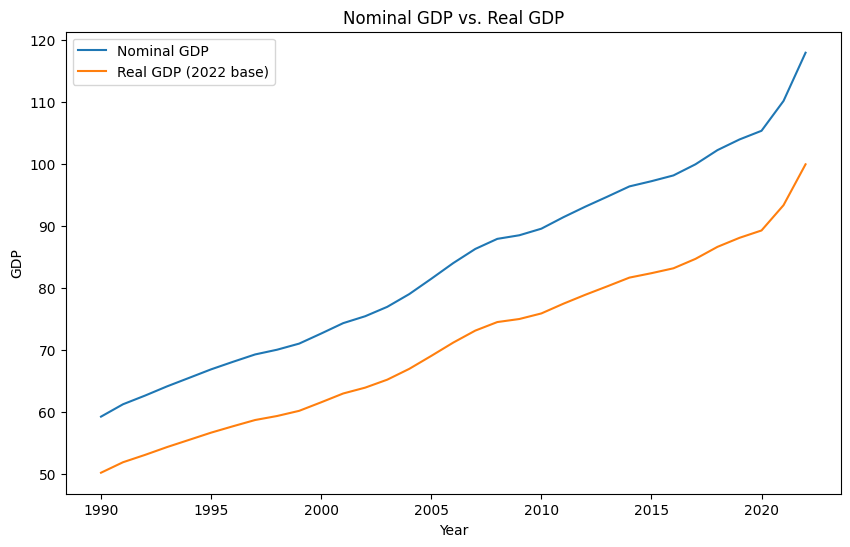

In [ ]:
# prompt: plot gdp against read gdp

import matplotlib.pyplot as plt

# Assuming cleaned_inflation_data is already defined with 'GDP' and 'Real GDP' columns

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(cleaned_inflation_data['YEAR'], cleaned_inflation_data['GDP'], label='Nominal GDP')
plt.plot(cleaned_inflation_data['YEAR'], cleaned_inflation_data['Real GDP'], label='Real GDP (2022 base)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Nominal GDP vs. Real GDP')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
# prompt: make a table with difference in real gdp and gdp and plot that too
%%capture
from google.colab import auth
from google.colab import drive
import os
from google.cloud import storage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px
import io
from google.colab import files

# Assuming cleaned_inflation_data is already defined with 'GDP' and 'Real GDP' columns

# Calculate the difference between GDP and Real GDP
cleaned_inflation_data['GDP Difference'] = cleaned_inflation_data['GDP'] - cleaned_inflation_data['Real GDP']

# Create a table with the difference
table_data = cleaned_inflation_data[['YEAR', 'GDP', 'Real GDP', 'GDP Difference']]

# Print the table
print(table_data)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(cleaned_inflation_data['YEAR'], cleaned_inflation_data['GDP Difference'], label='GDP Difference')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('GDP Difference')
plt.title('Difference Between Nominal and Real GDP')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
# prompt: find the object type of data in  cleaned_sales_data_county
%%capture
# Assuming cleaned_sales_data_county is already defined

# Iterate through each column and print the data type
for column in cleaned_sales_data_county.columns:
  print(f"Column '{column}' has data type: {cleaned_sales_data_county[column].dtype}")

print(cleaned_sales_data_county.info())

In [ ]:
# Iterate through each column and convert if it's an object type and has "MEASURED_IN_DOLLARS" in the name
%%capture
for column in cleaned_sales_data_county.columns:
    if "MEASURED_IN_DOLLARS" in column:
        if cleaned_sales_data_county[column].dtype == object:
            # Remove non-numeric characters such as commas or dollar signs
            cleaned_sales_data_county[column] = cleaned_sales_data_county[column].str.replace(r'[^\d.-]', '', regex=True)

            try:
                # Convert the cleaned column to numeric type
                cleaned_sales_data_county[column] = pd.to_numeric(cleaned_sales_data_county[column], errors='coerce')
                print(f"Converted column '{column}' to numeric.")
            except ValueError:
                print(f"Could not convert column '{column}' to numeric.")
        else:
            print(f"Column '{column}' is already numeric.")
    else:
        print(f"Column '{column}' does not contain 'MEASURED_IN_DOLLARS' in its name.")

# Print the updated data types
for column in cleaned_sales_data_county.columns:
    print(f"Column '{column}' has data type: {cleaned_sales_data_county[column].dtype}")



In [ ]:
# prompt: print info of the previous df
%%capture
print(cleaned_sales_data_county.info())
print(cleaned_sales_data_county.head())


In [ ]:
# prompt: convert all NaN values to 0
%%capture
cleaned_sales_data_county = cleaned_sales_data_county.fillna(0)
print(cleaned_sales_data_county.info())


In [ ]:
# prompt: group by year and find the mean of all sales data in the column with MEASURED_IN_DOLLARS in their name and find the mean associated with each year
%%capture
from google.colab import auth
from google.colab import drive
import os
from google.cloud import storage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px
import io
from google.colab import files
# ... (Your existing code for loading and cleaning dataframes) ...


# Group by year and find the mean of all sales data columns
sales_by_year = cleaned_sales_data_county.groupby('YEAR')[
    [col for col in cleaned_sales_data_county.columns if 'MEASURED_IN_DOLLARS' in col]
].mean()

# Print the mean sales for each year
print(sales_by_year)


In [ ]:
# prompt: merge this with cleaned_inflation on same years
%%capture
# Merge sales_by_year and cleaned_inflation_data on 'YEAR'
merged_df = pd.merge(sales_by_year, cleaned_inflation_data, on='YEAR', how='inner')

# Print the merged DataFrame
print(merged_df)


In [ ]:
# prompt: divide the sales columns by 100 and multiply by real gdp and create a new column associuated with each sale columns
%%capture
# Iterate through each sales column
for column in merged_df.columns:
  if 'MEASURED_IN_DOLLARS' in column:
    # Create a new column name with "_Adjusted" suffix
    new_column_name = column + "_Adjusted"

    # Calculate the adjusted value and assign it to the new column
    merged_df[new_column_name] = (merged_df[column] / 100) * merged_df['Real GDP']

# Print the updated DataFrame with the new columns
print(merged_df)


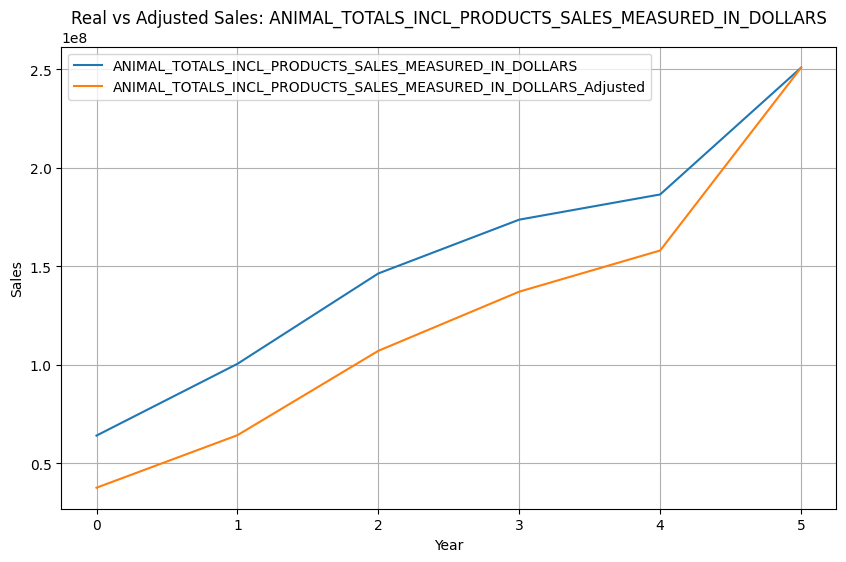

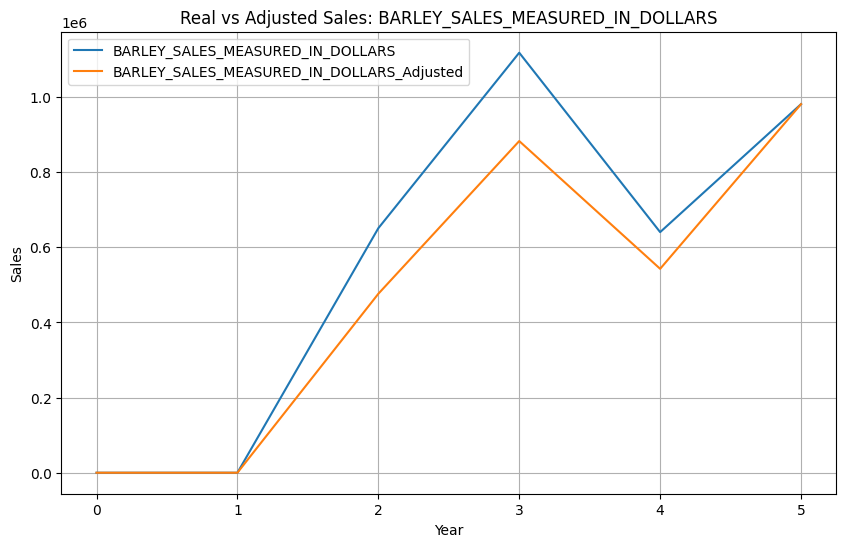

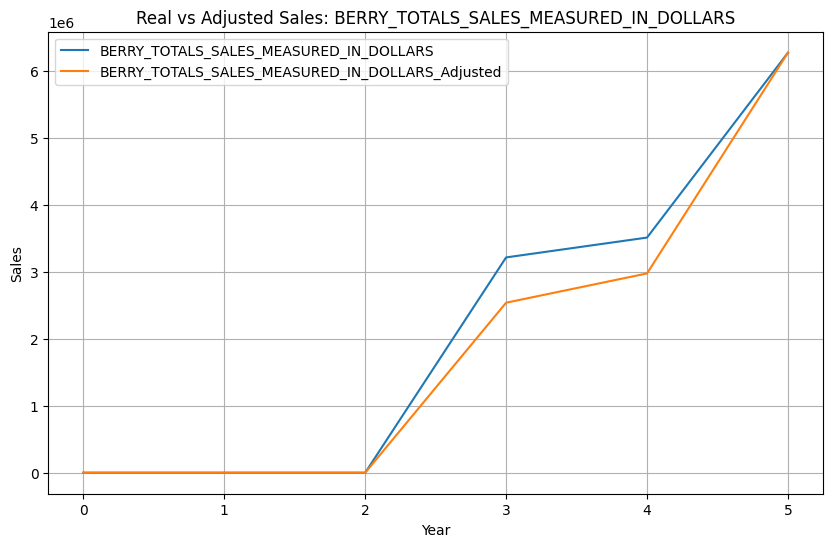

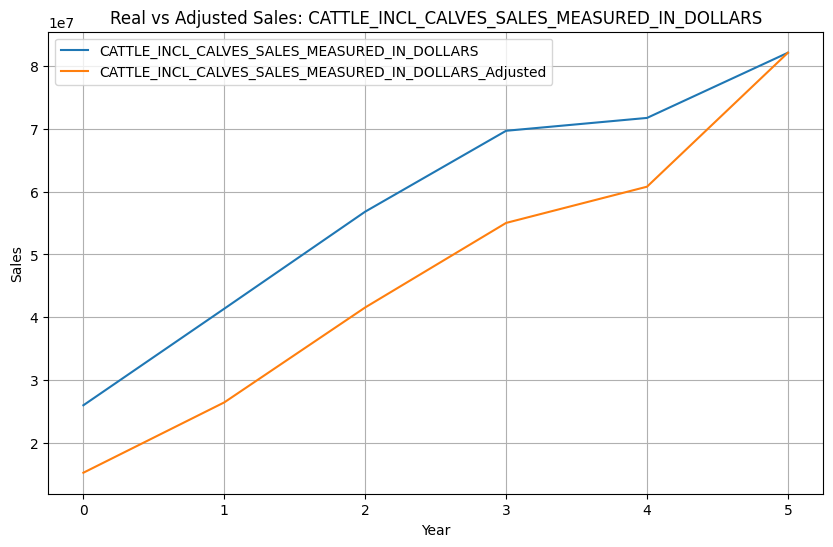

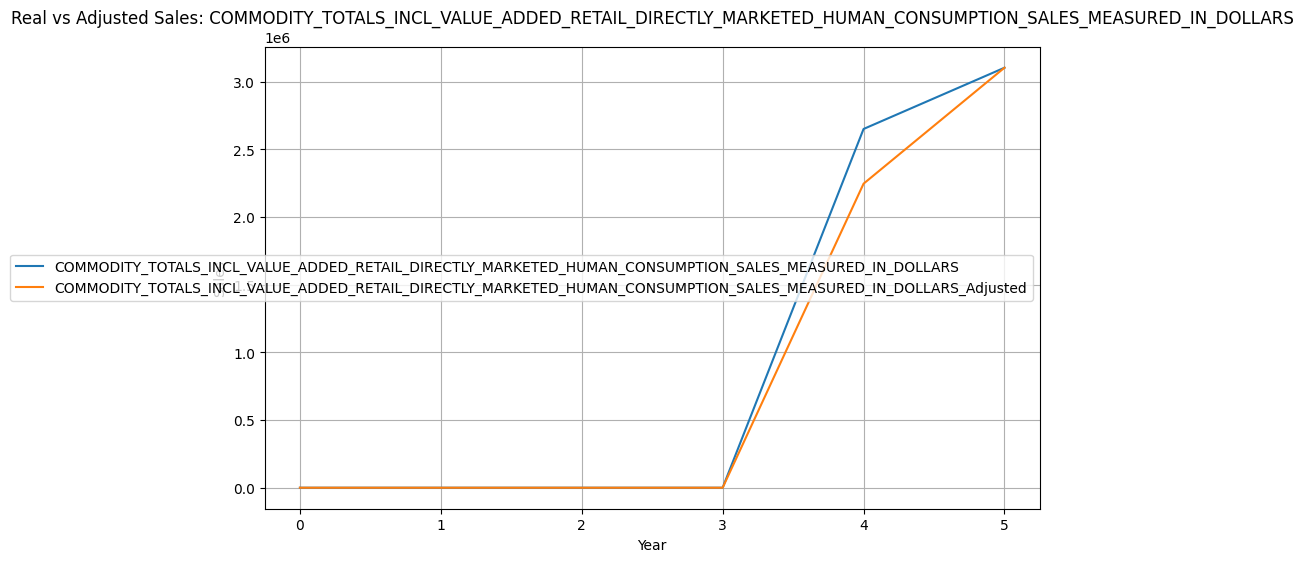

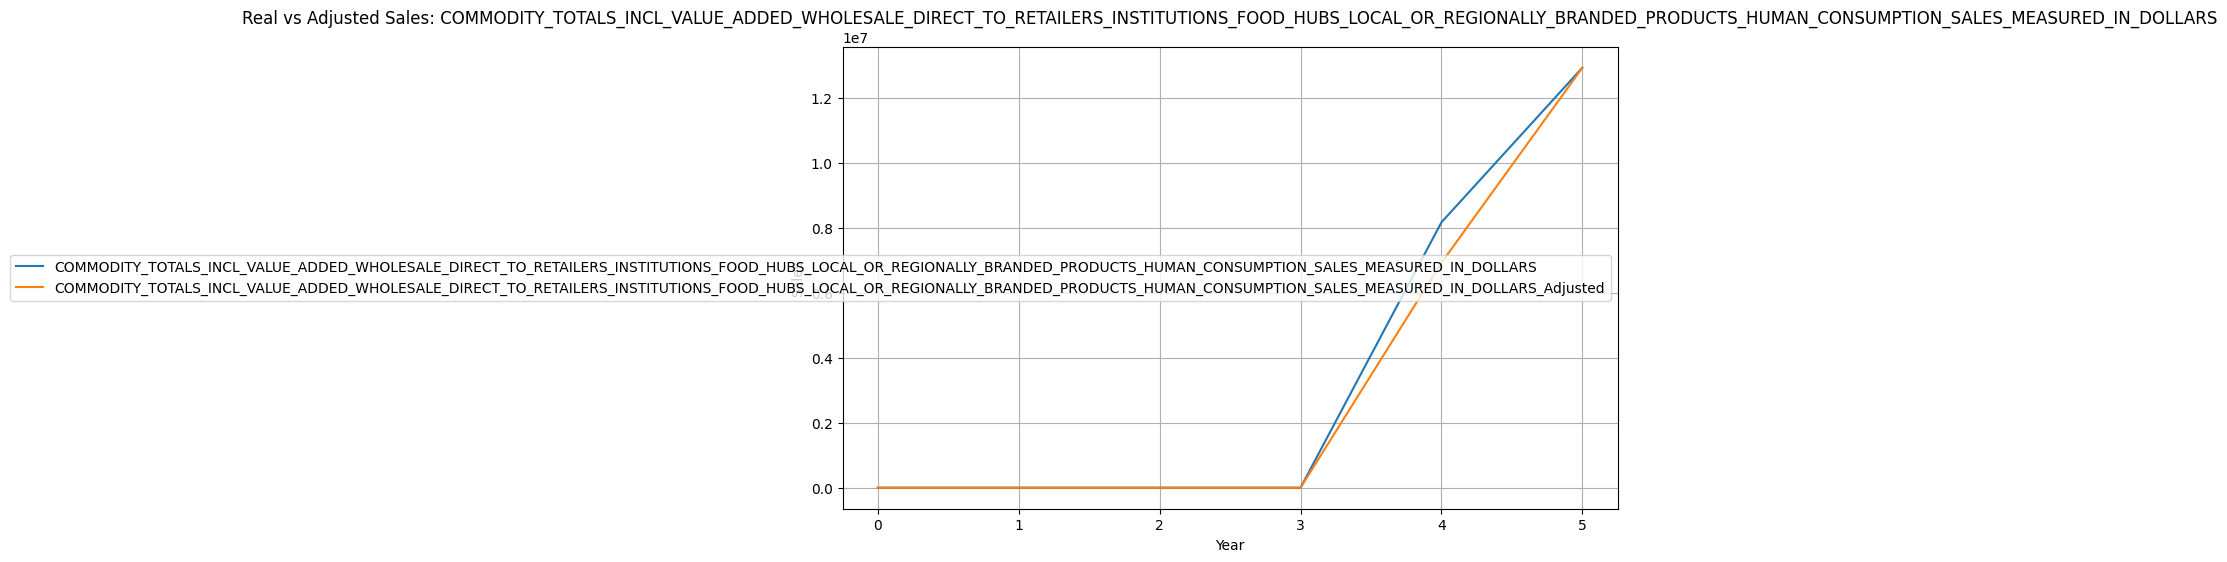

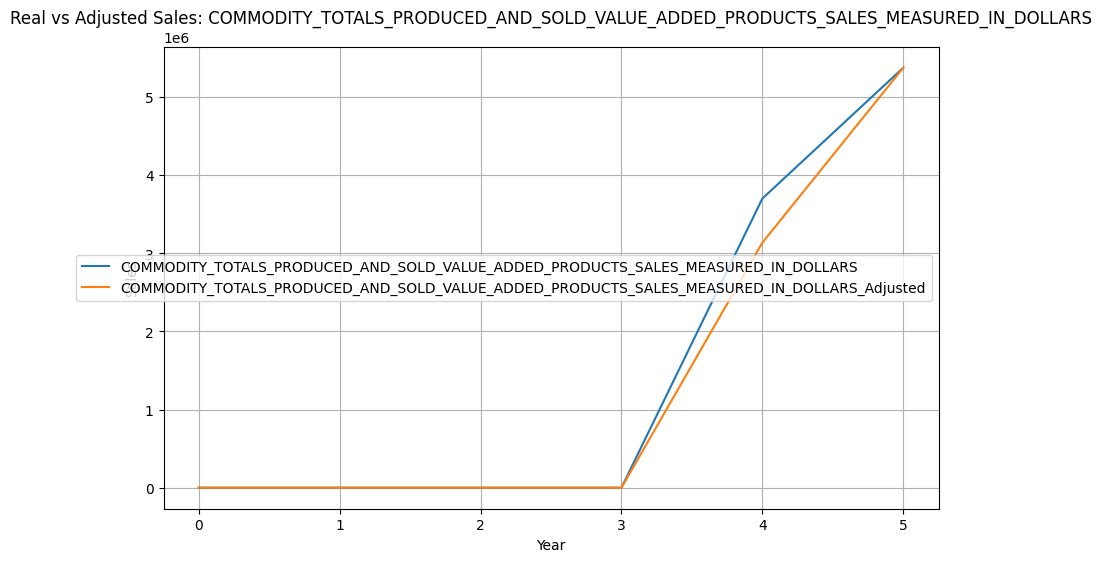

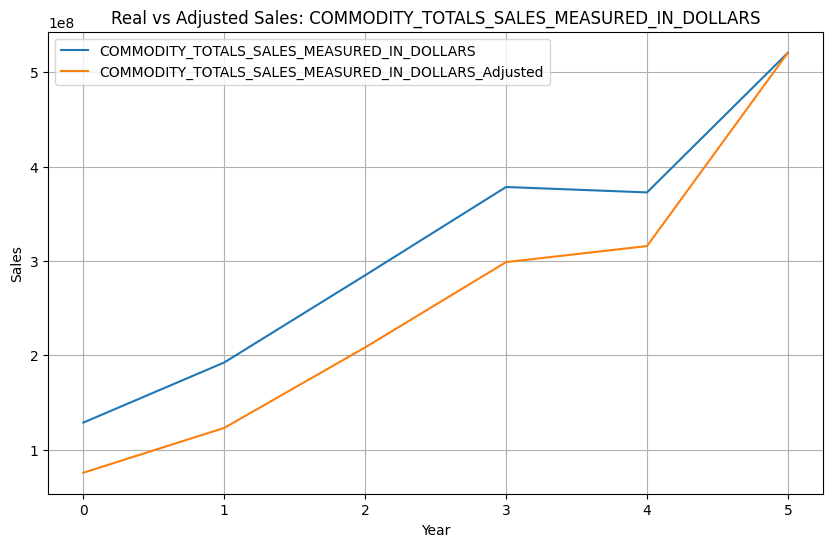

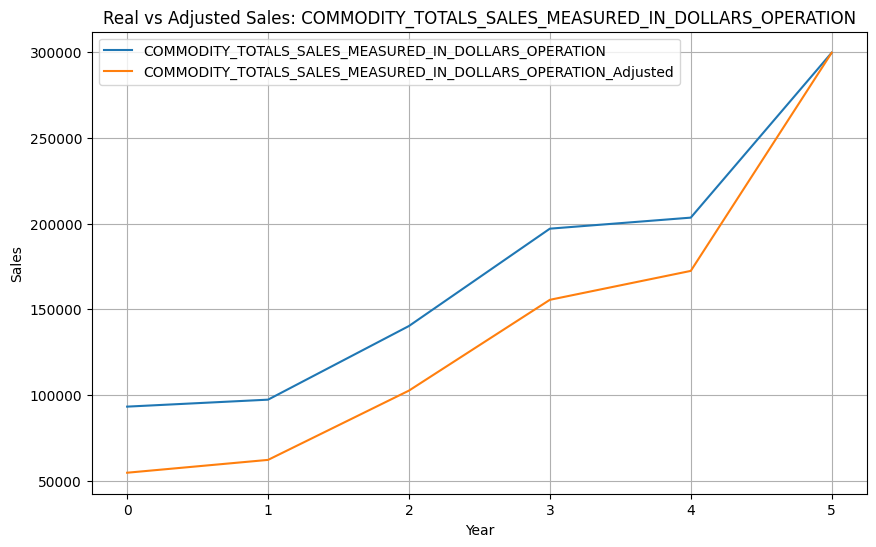

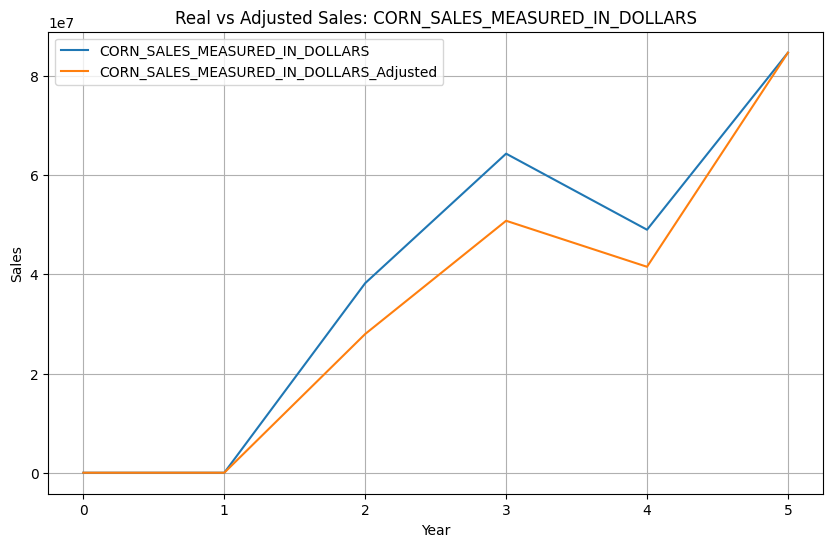

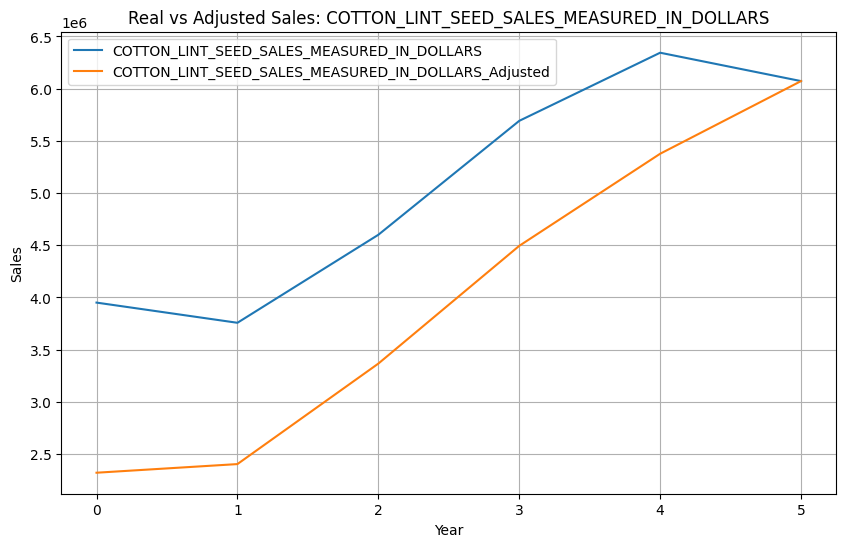

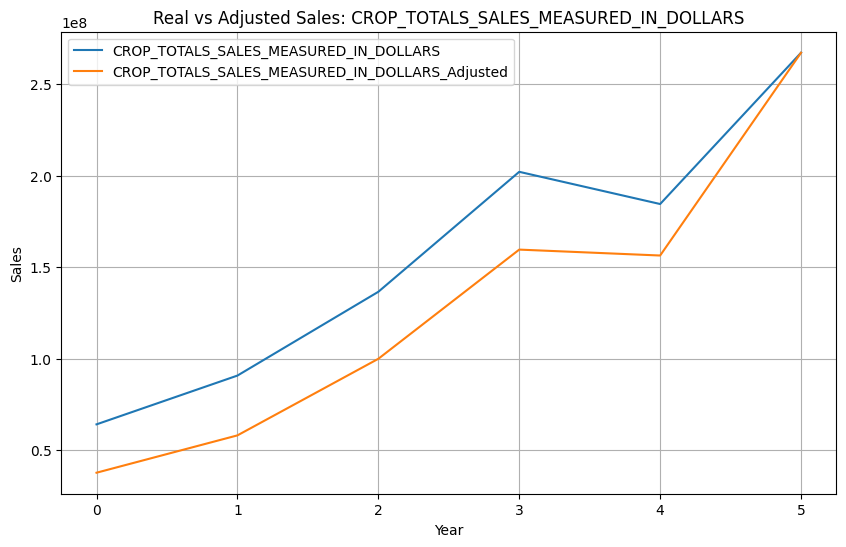

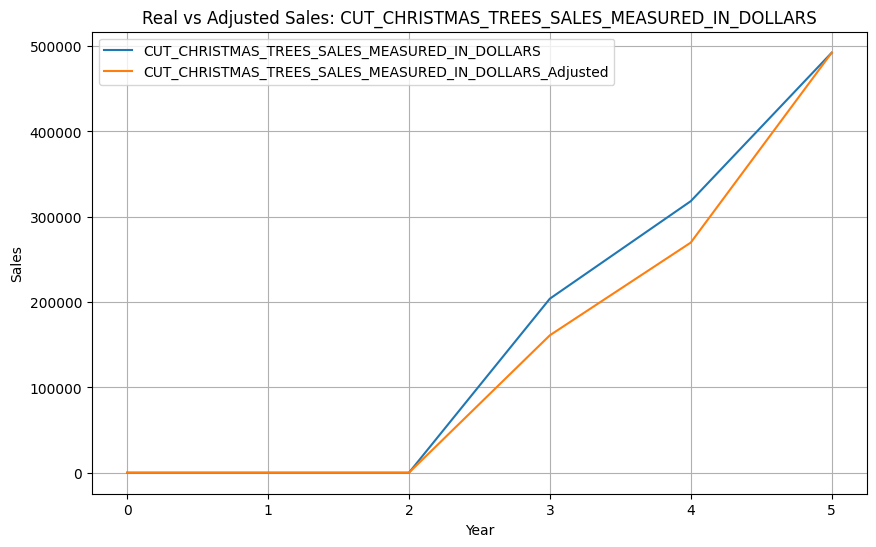

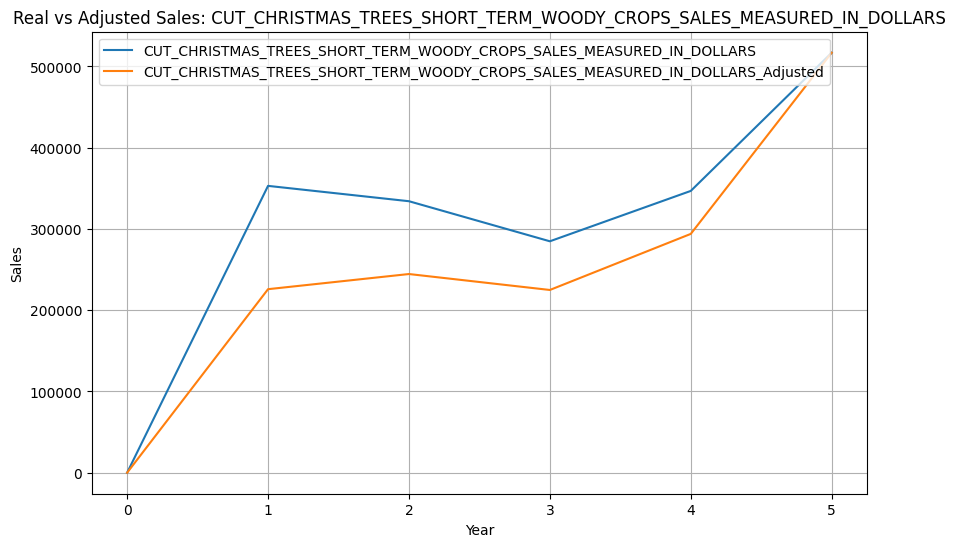

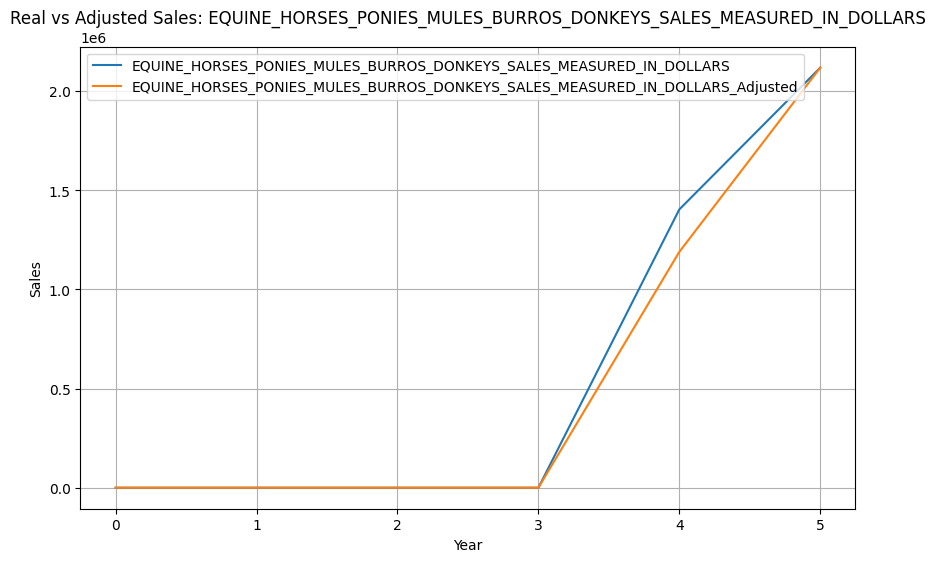

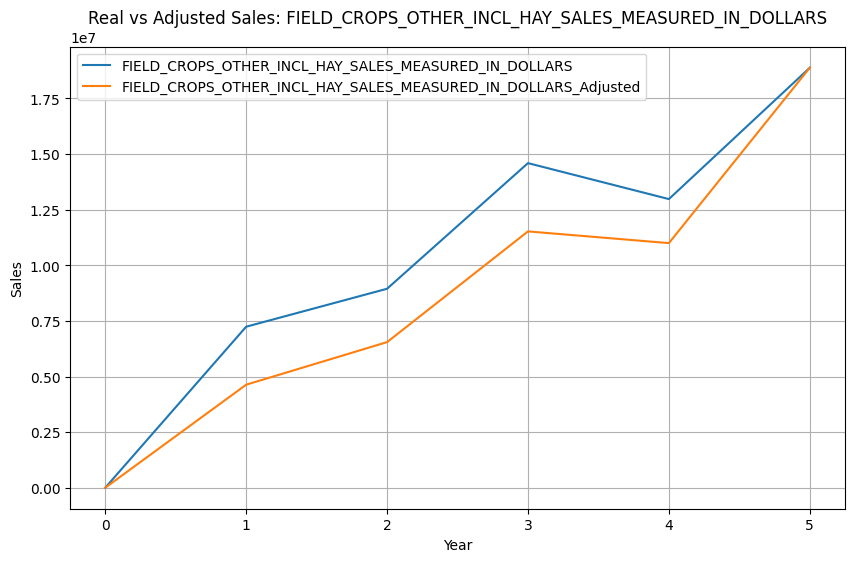

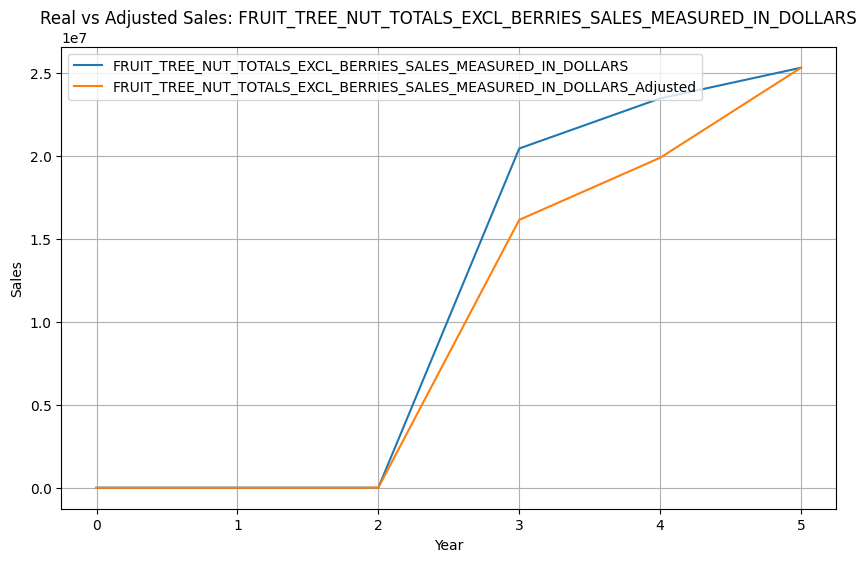

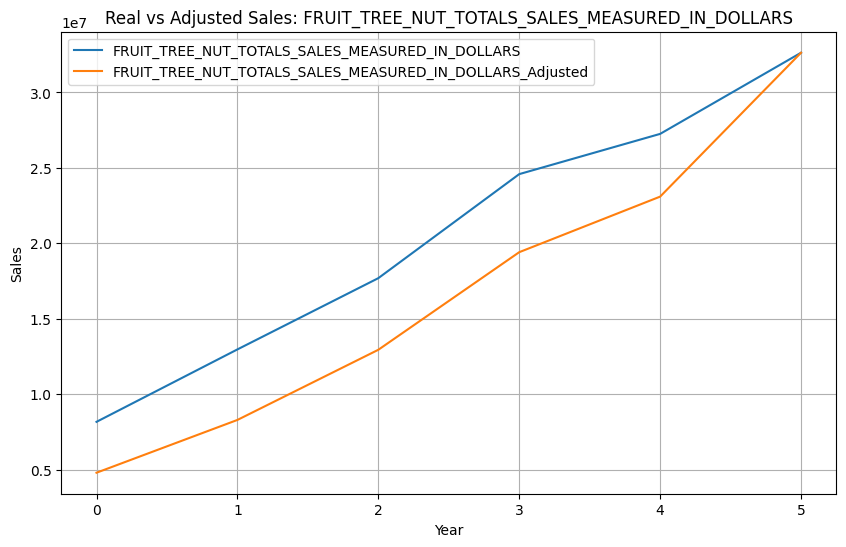

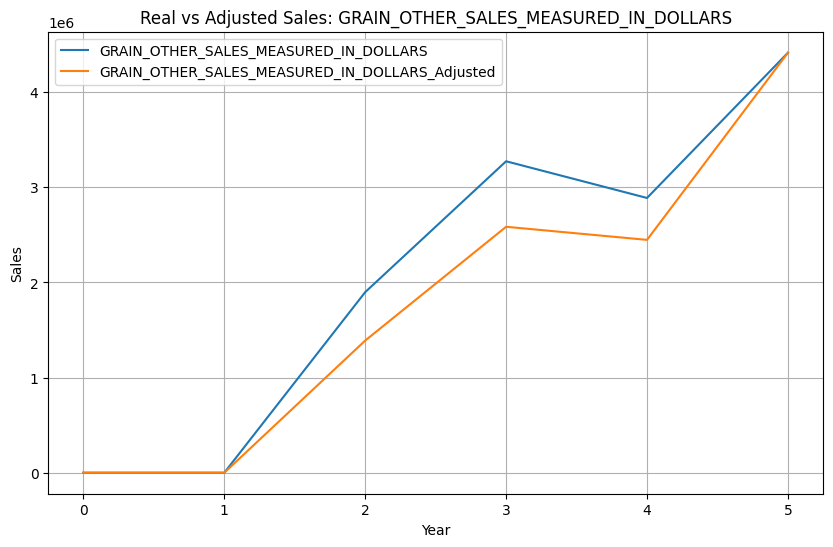

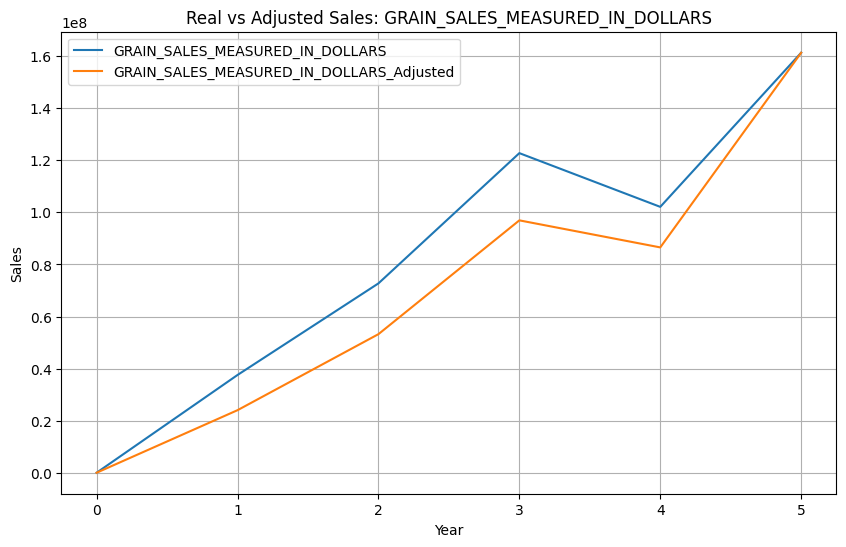

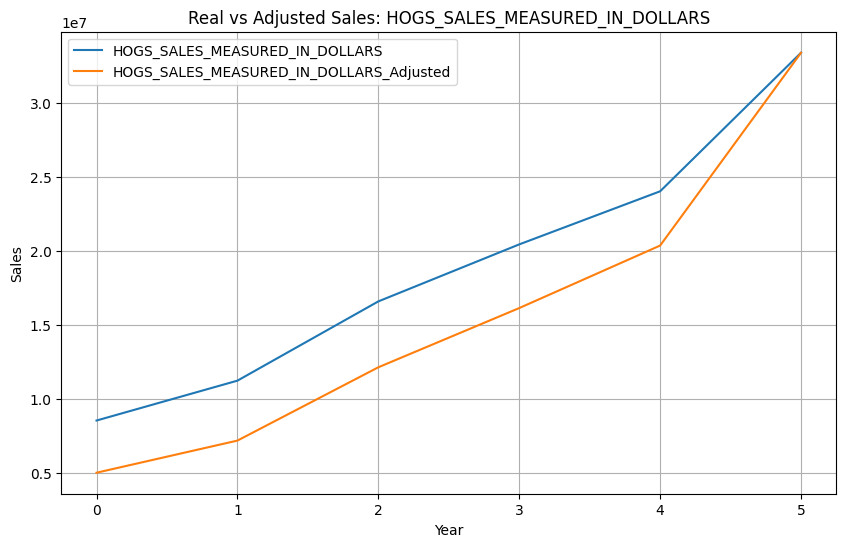

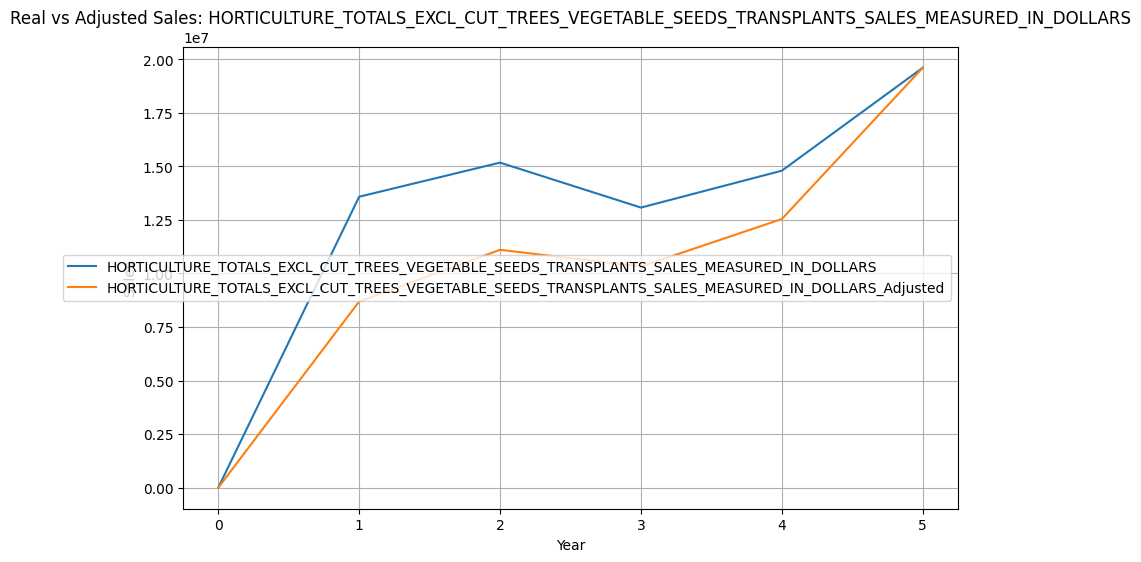

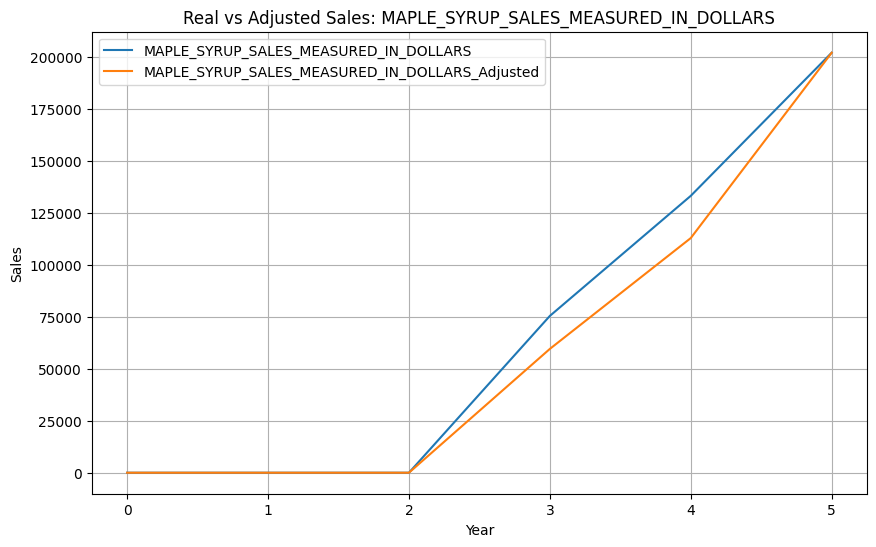

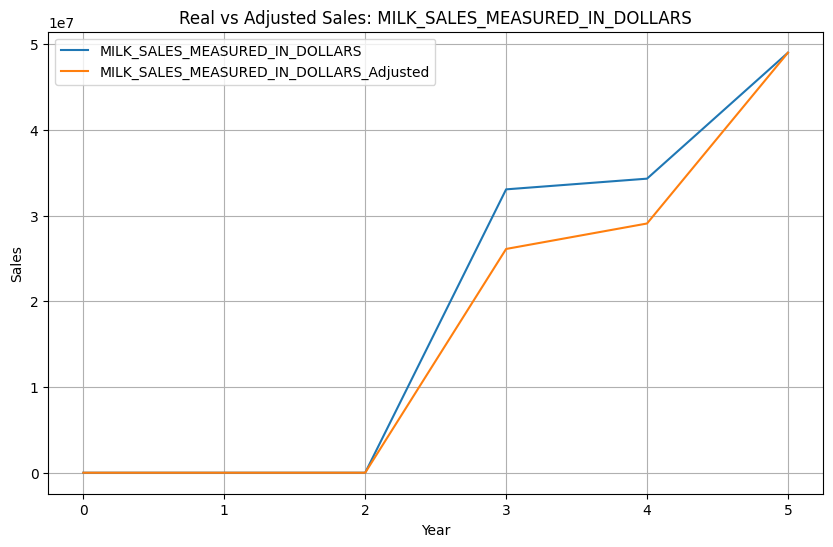

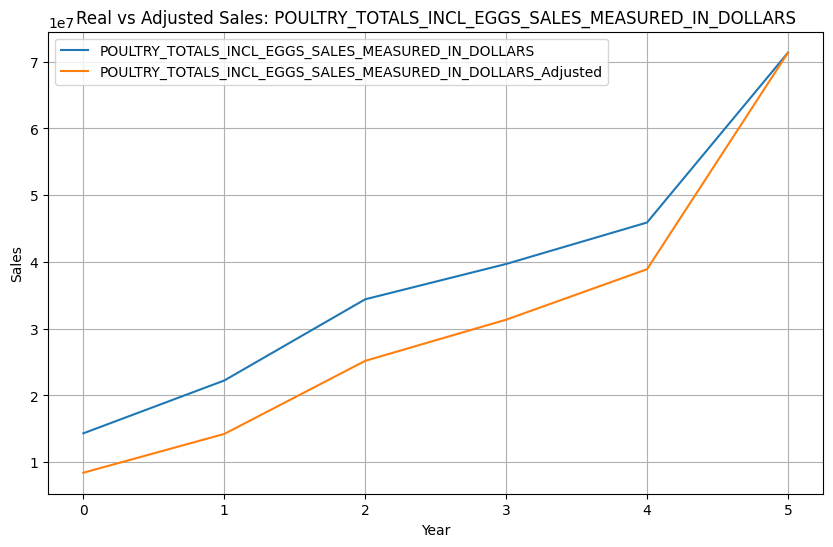

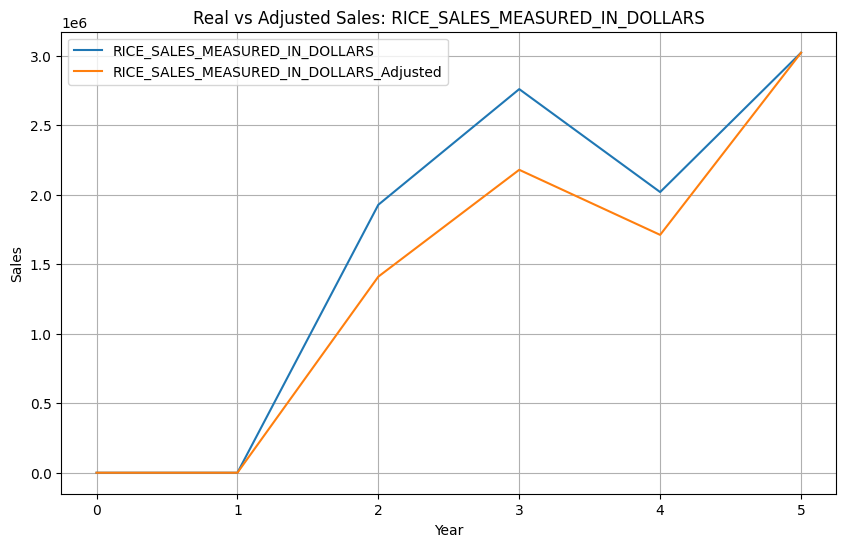

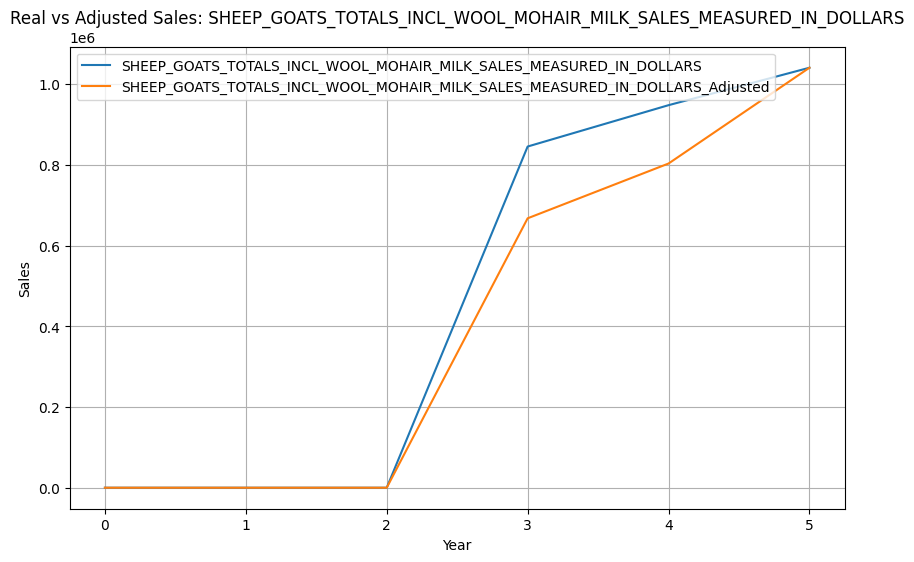

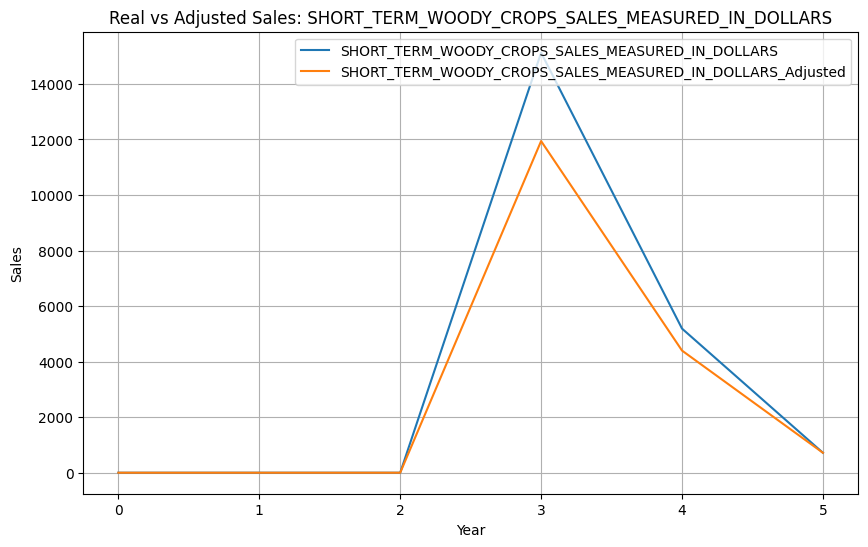

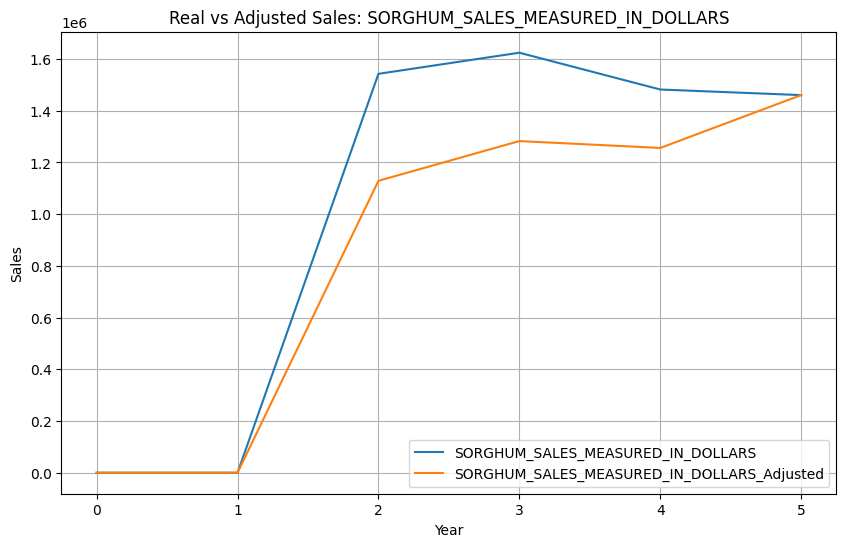

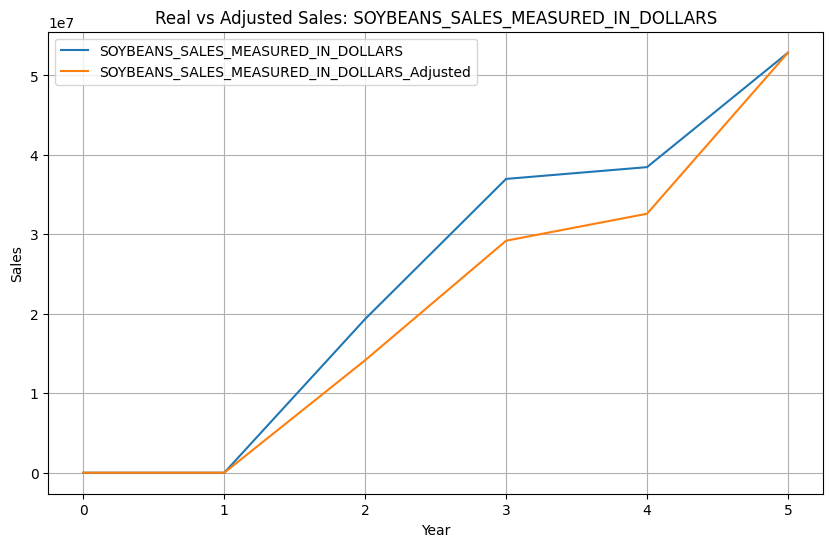

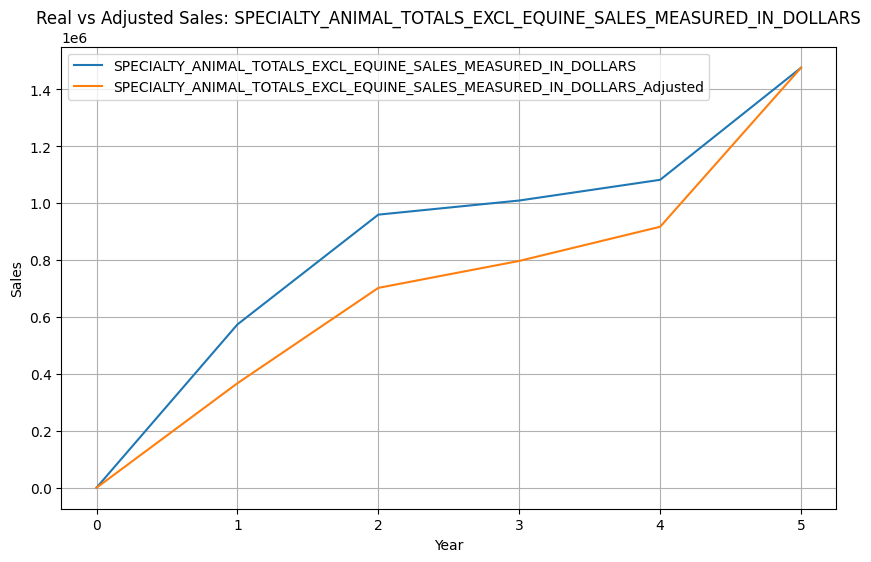

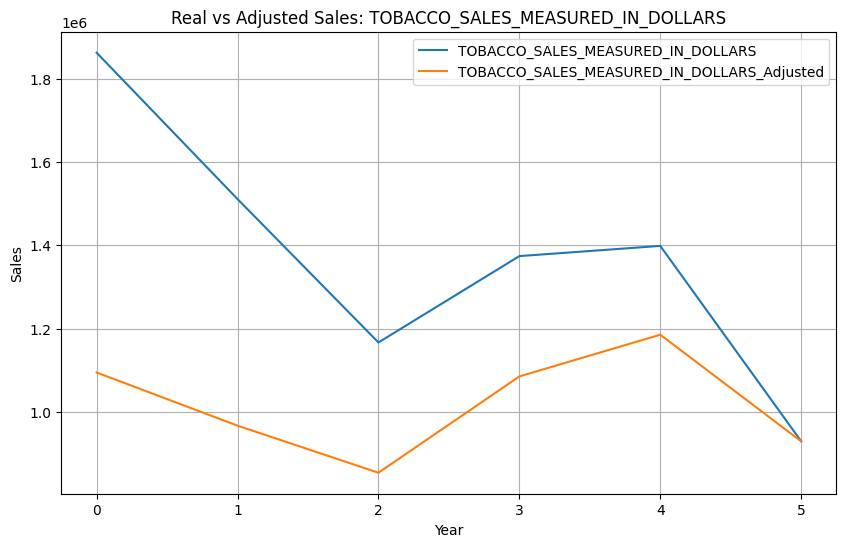

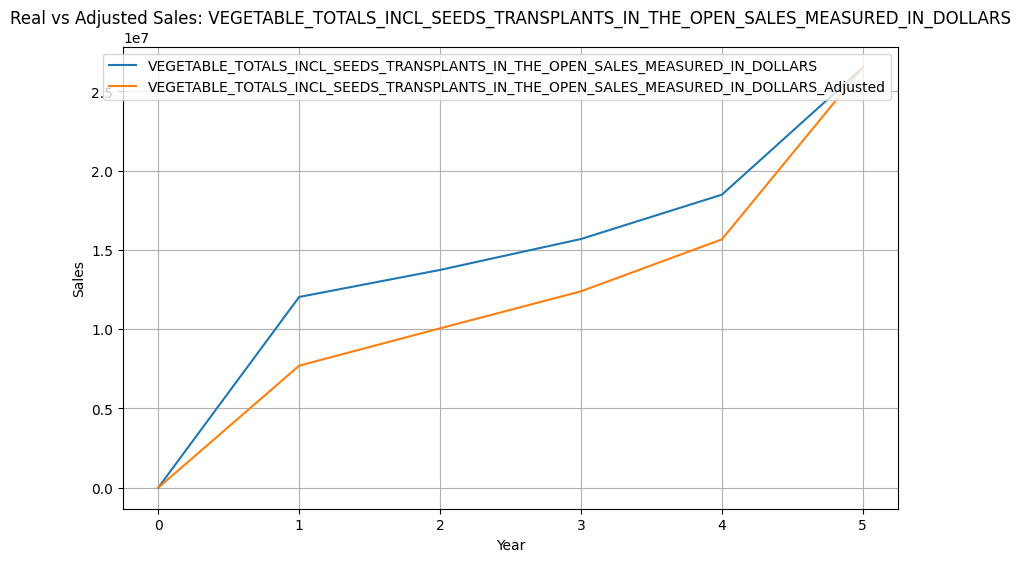

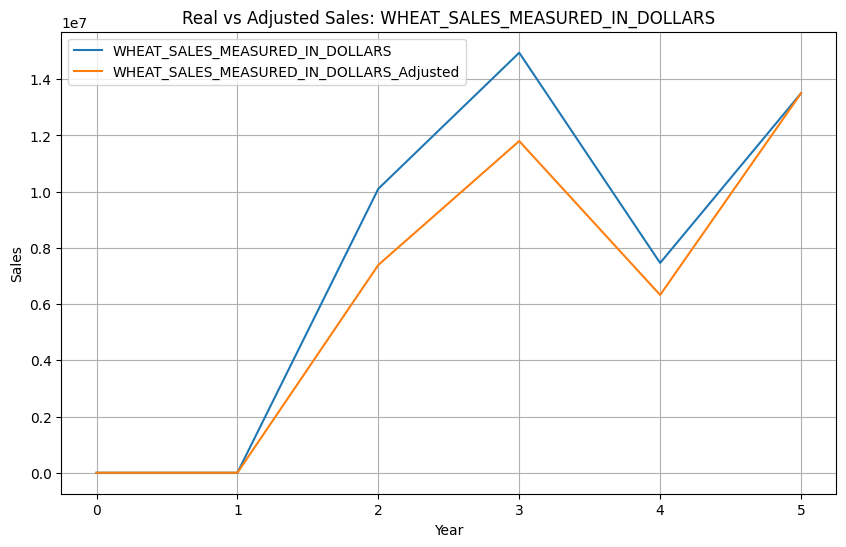

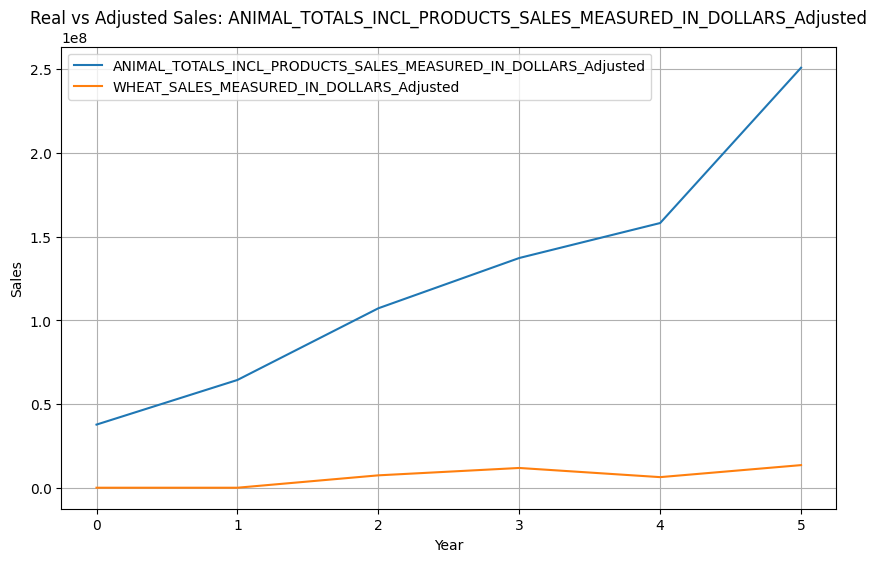

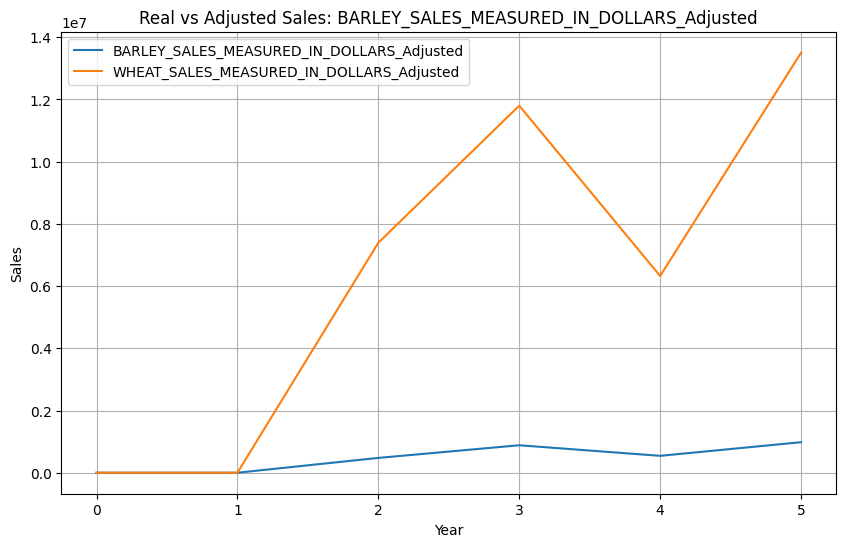

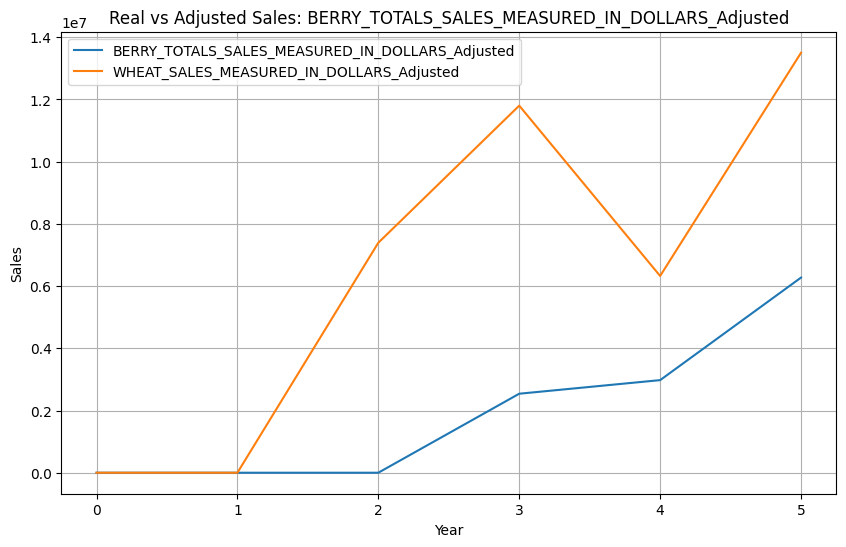

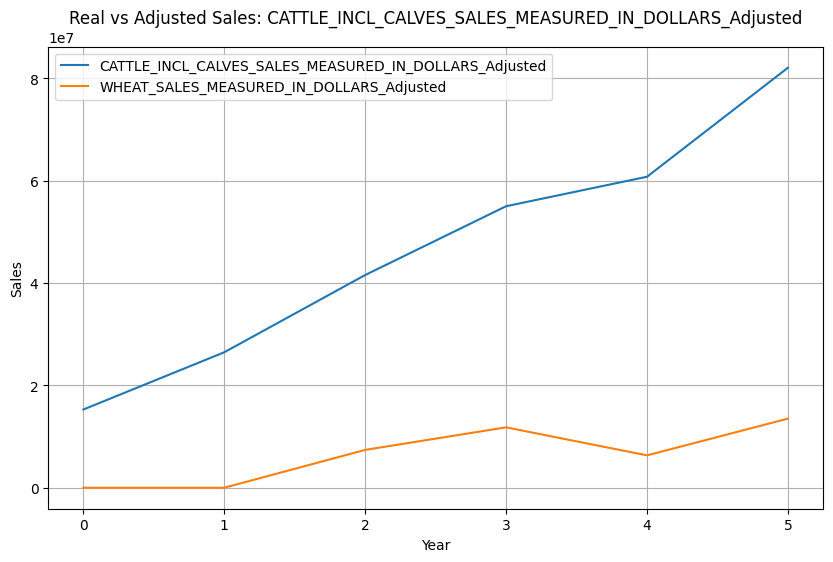

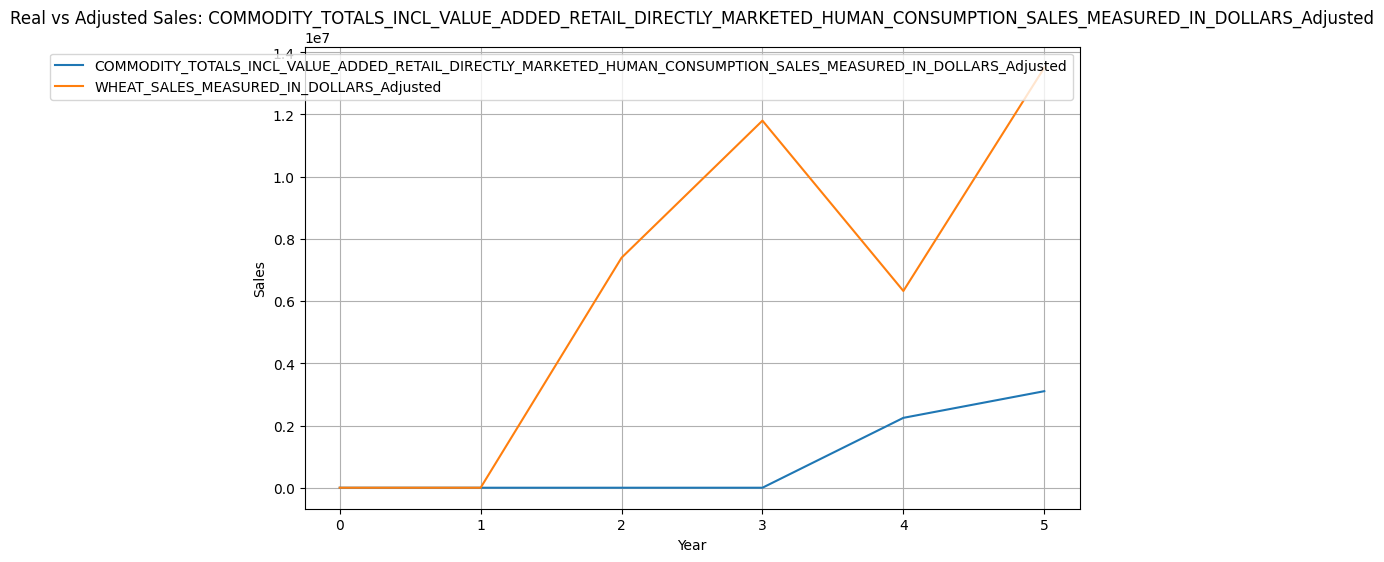

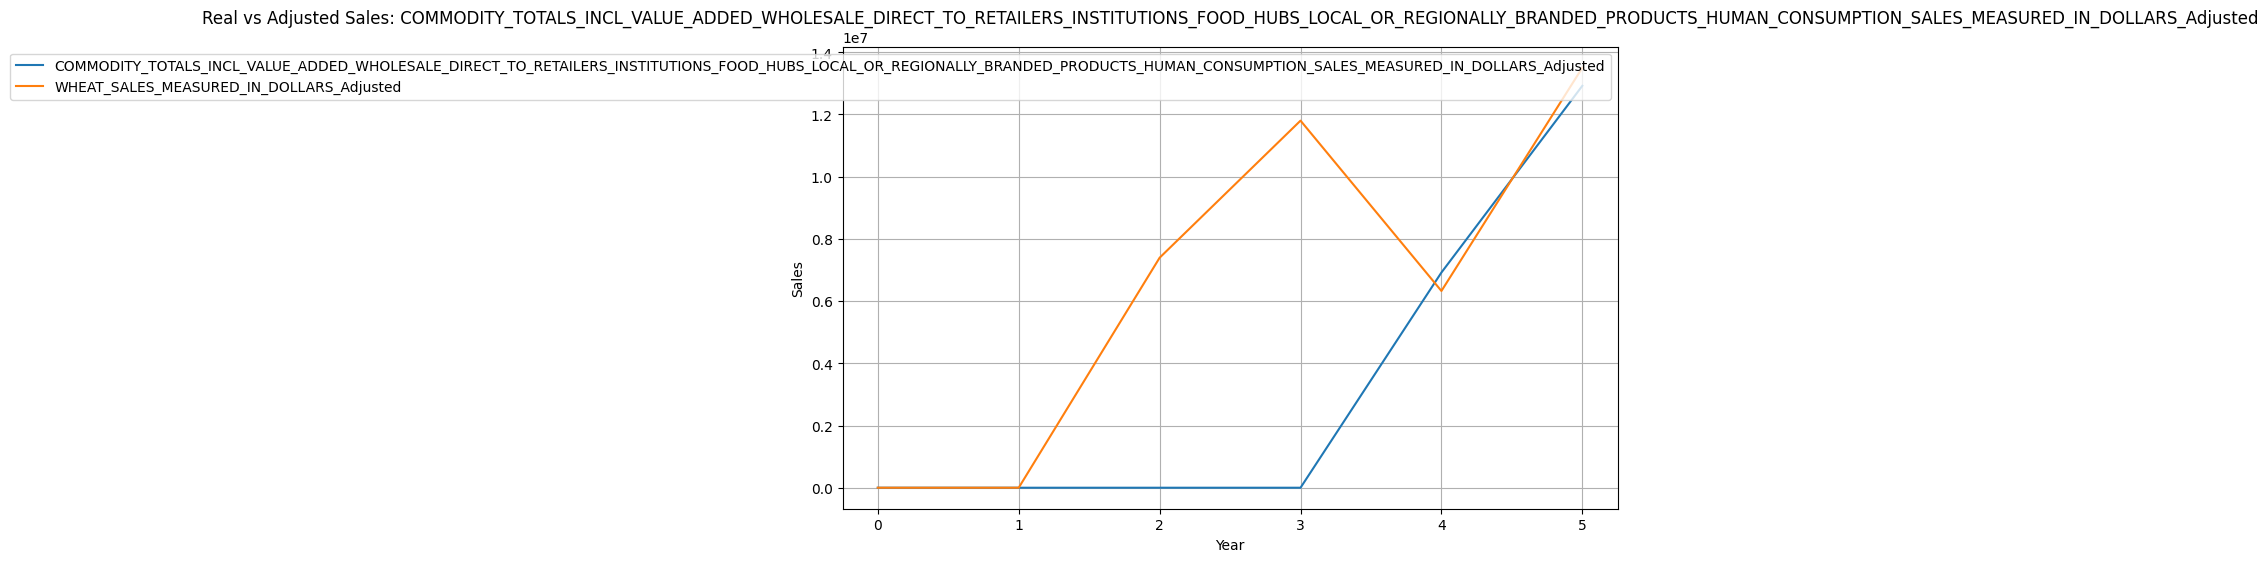

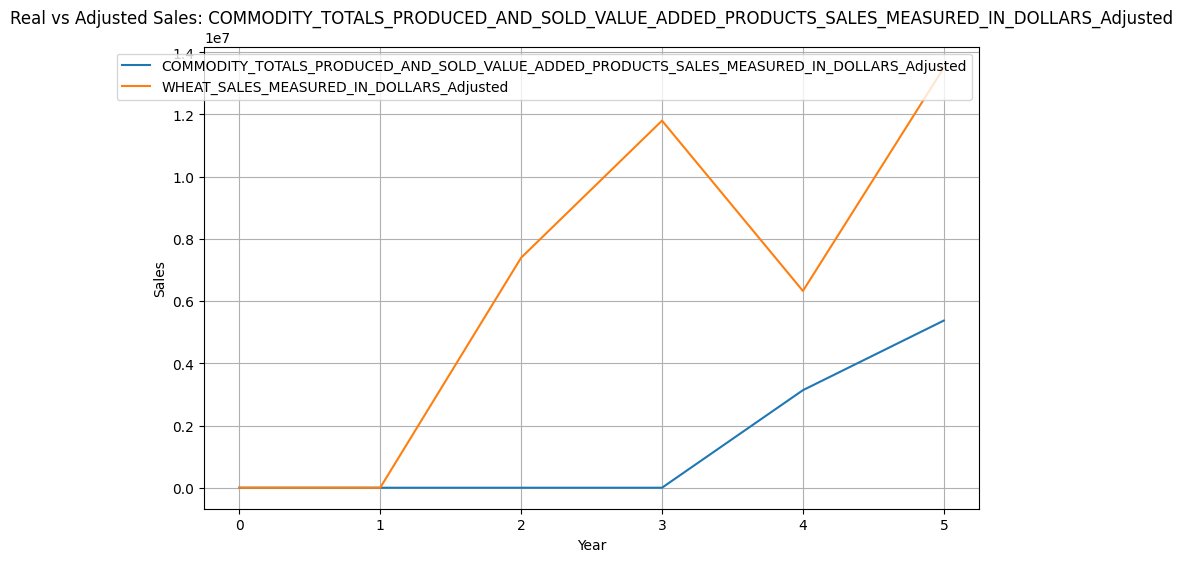

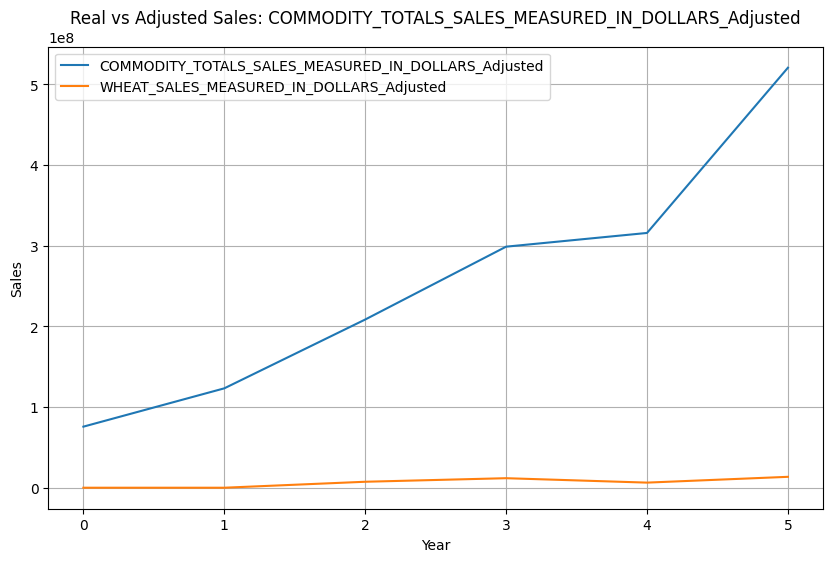

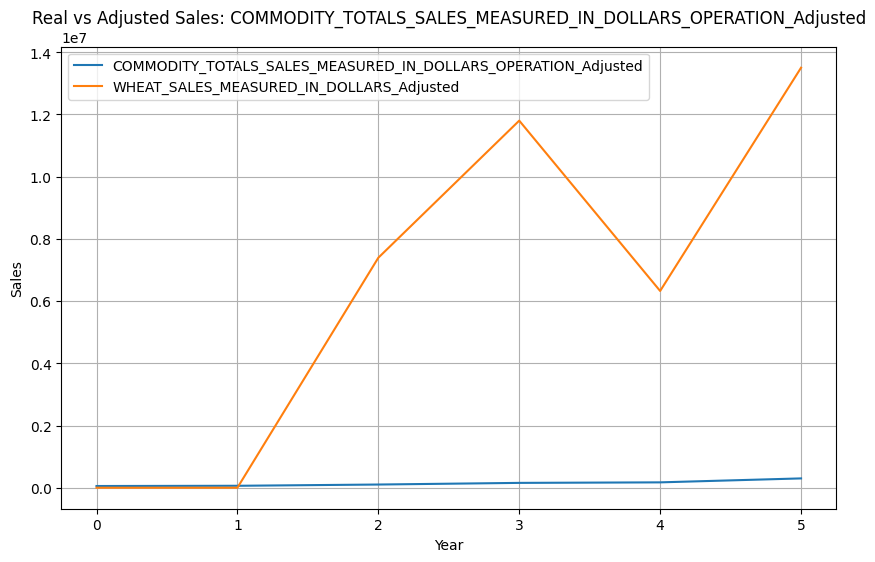

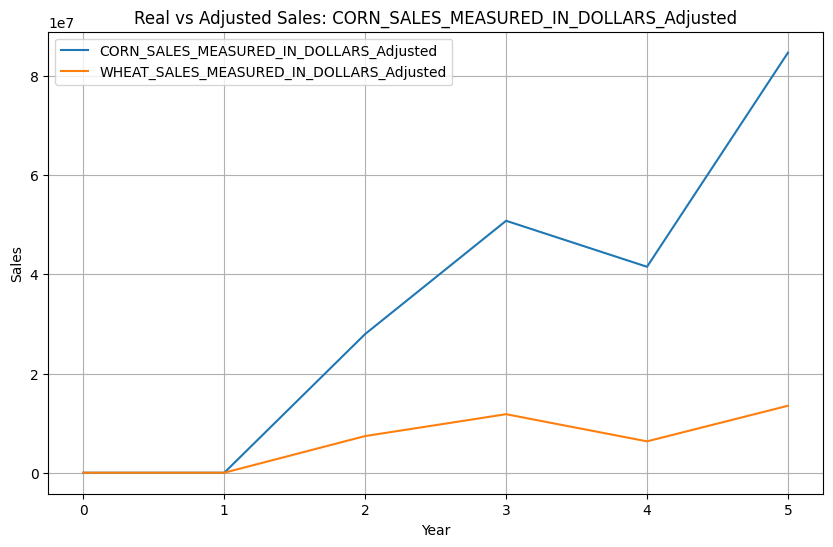

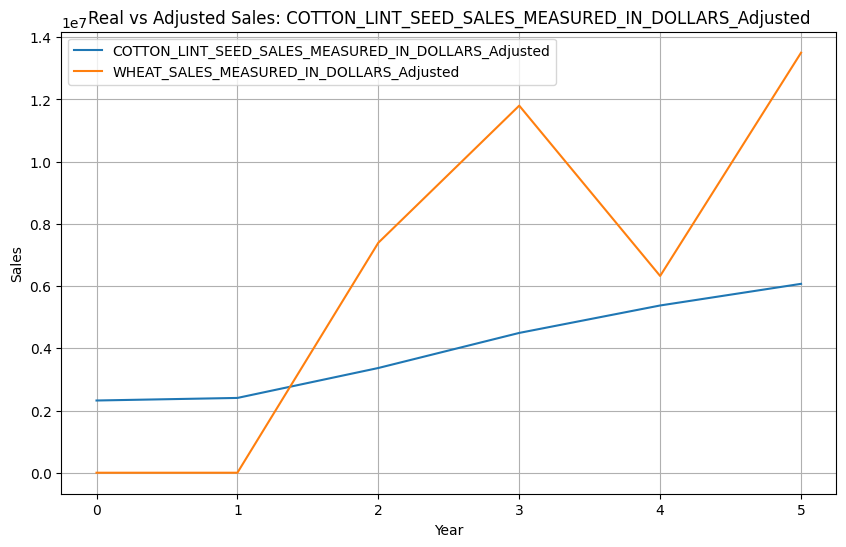

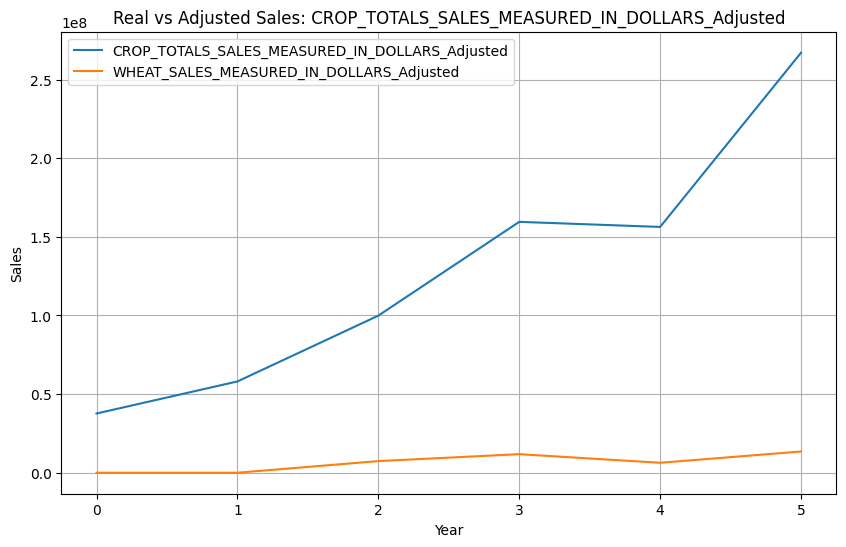

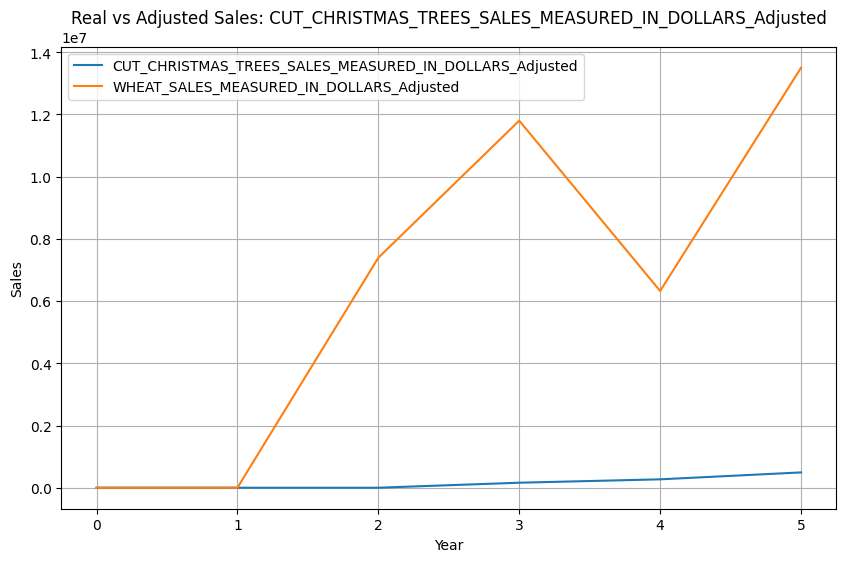

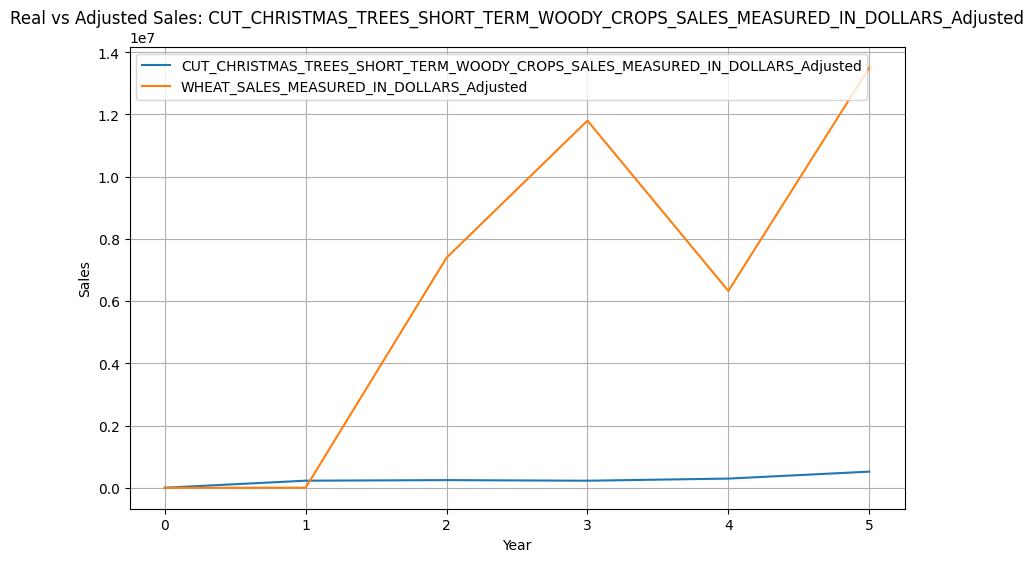

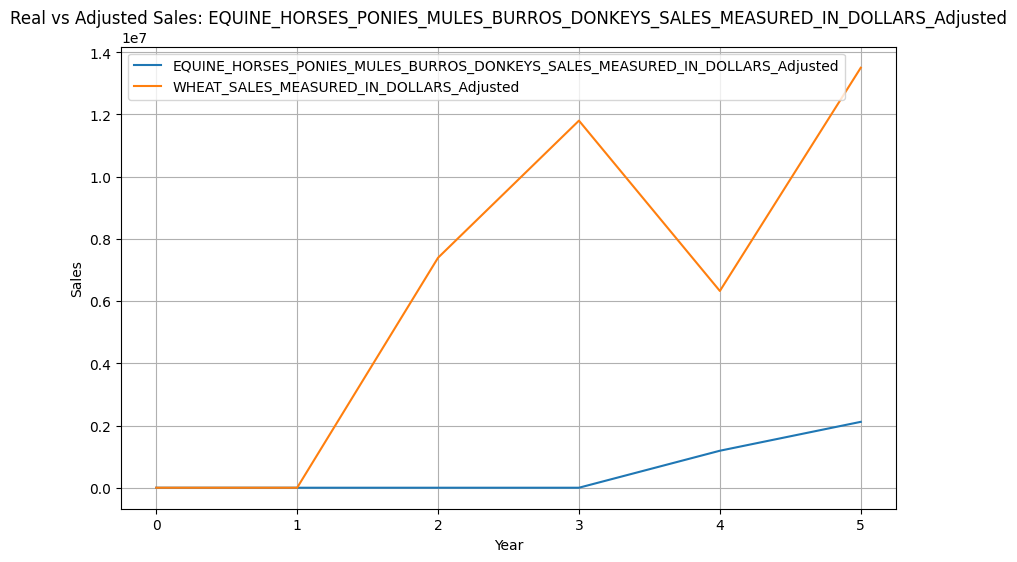

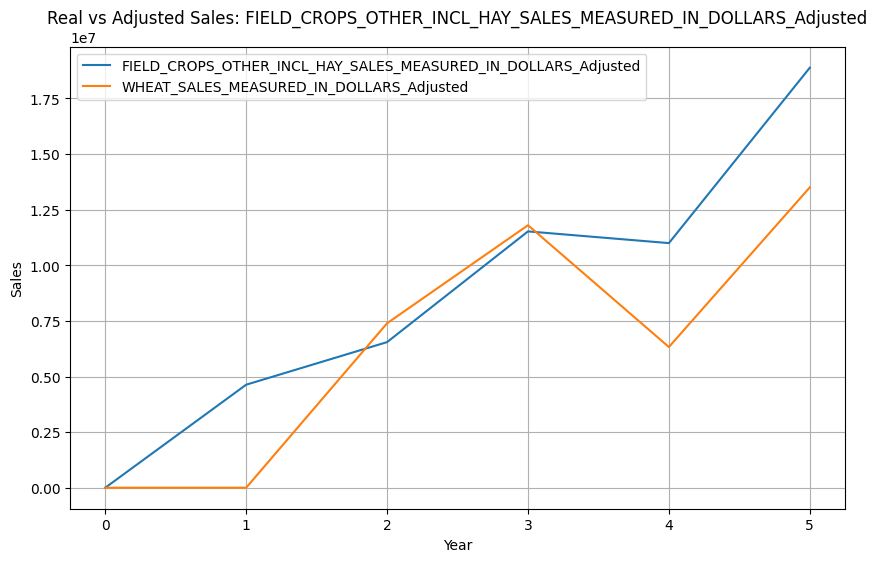

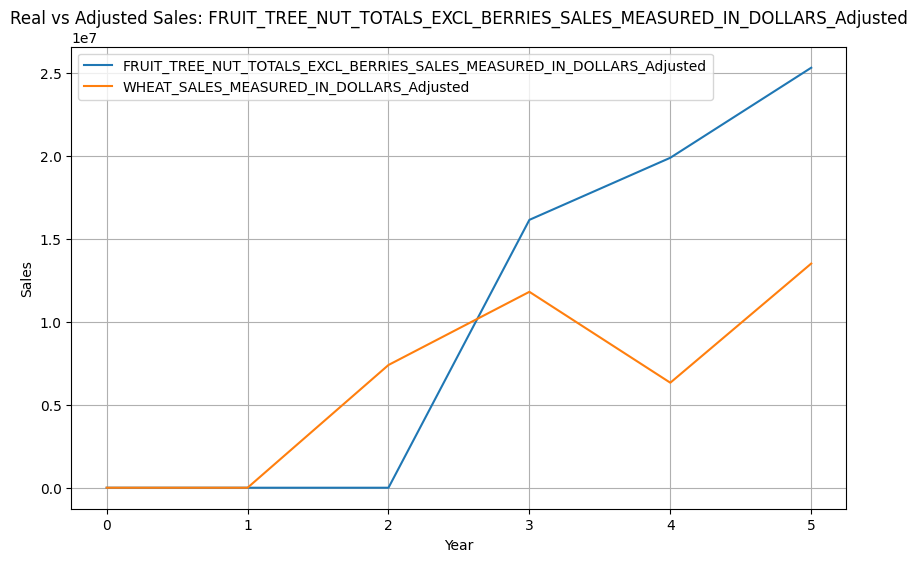

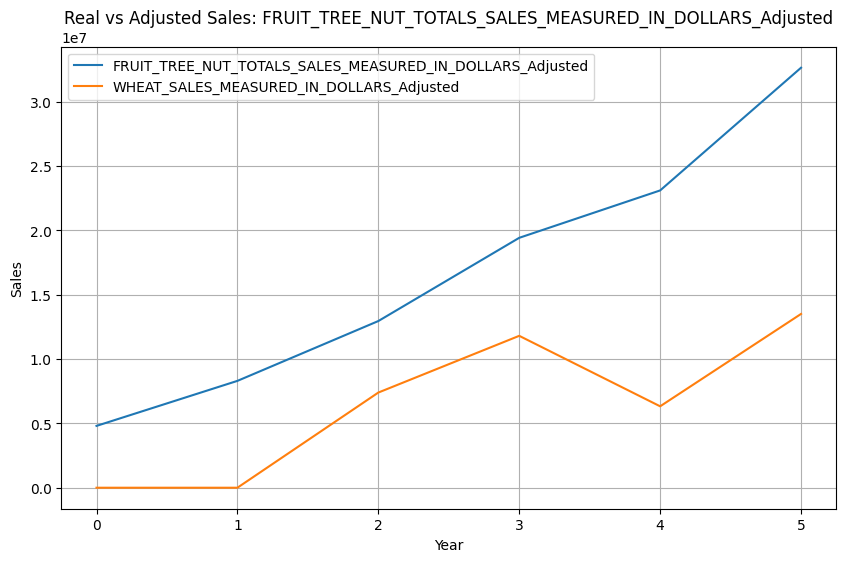

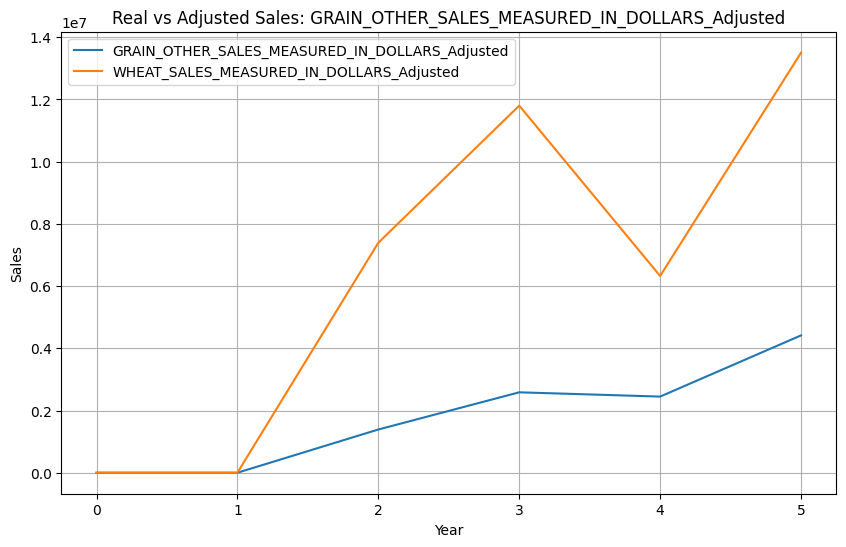

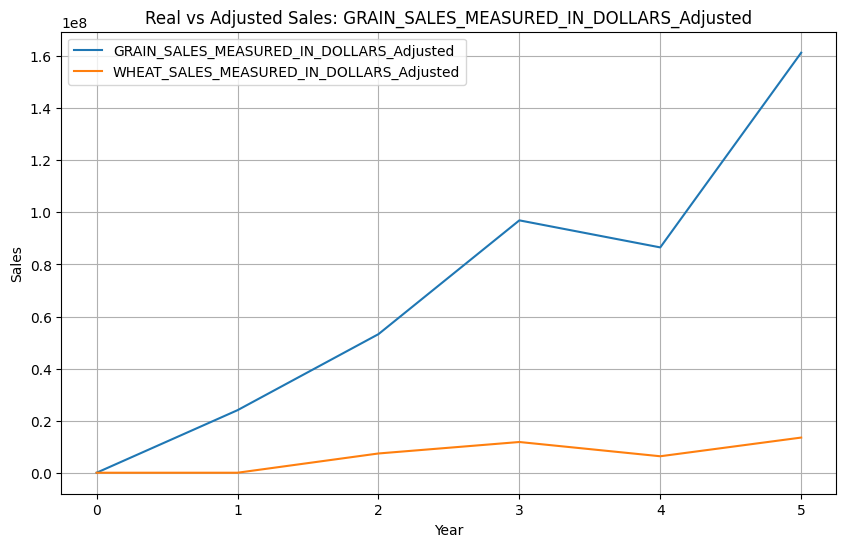

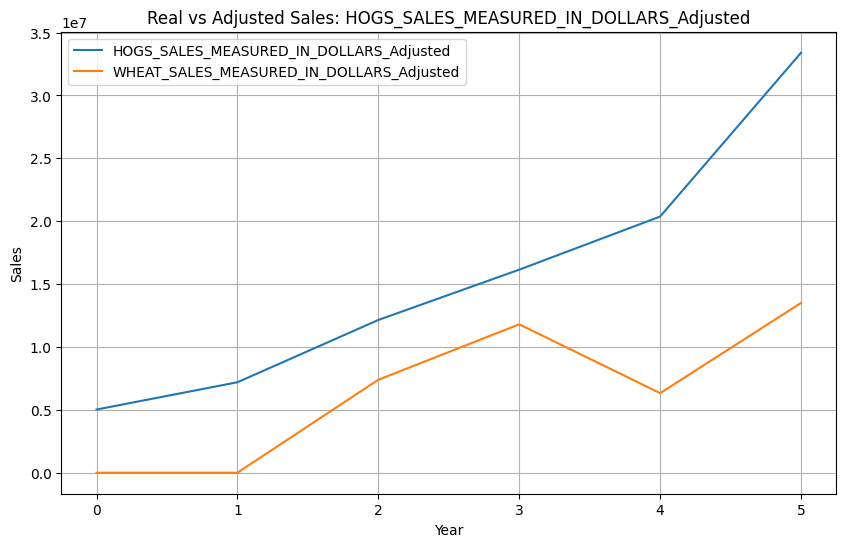

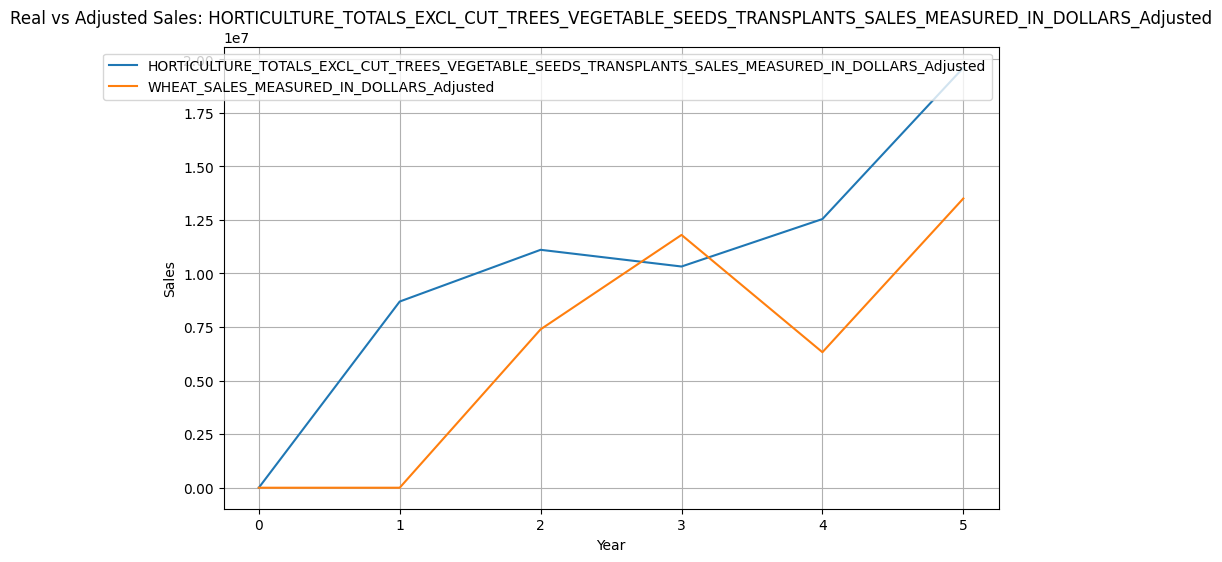

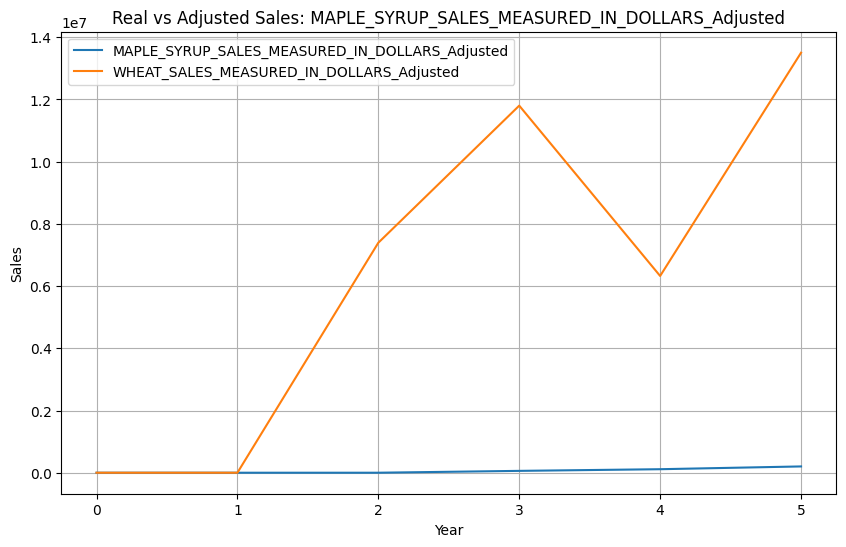

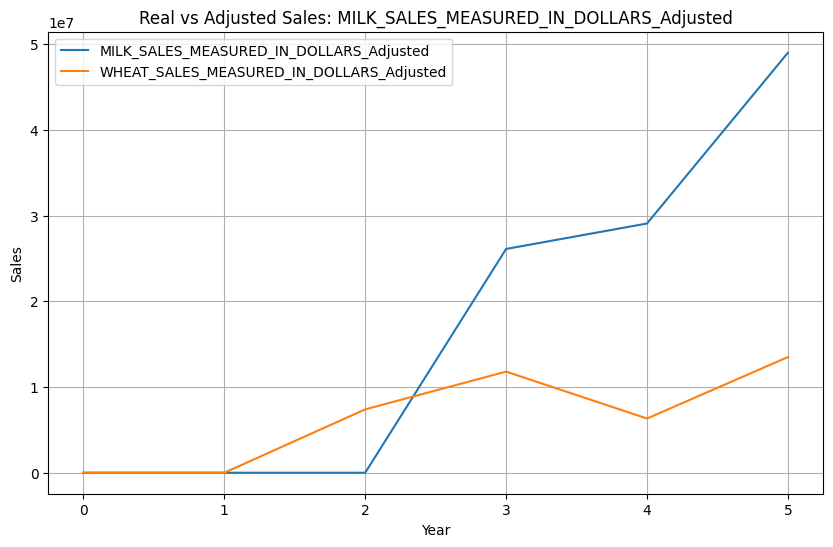

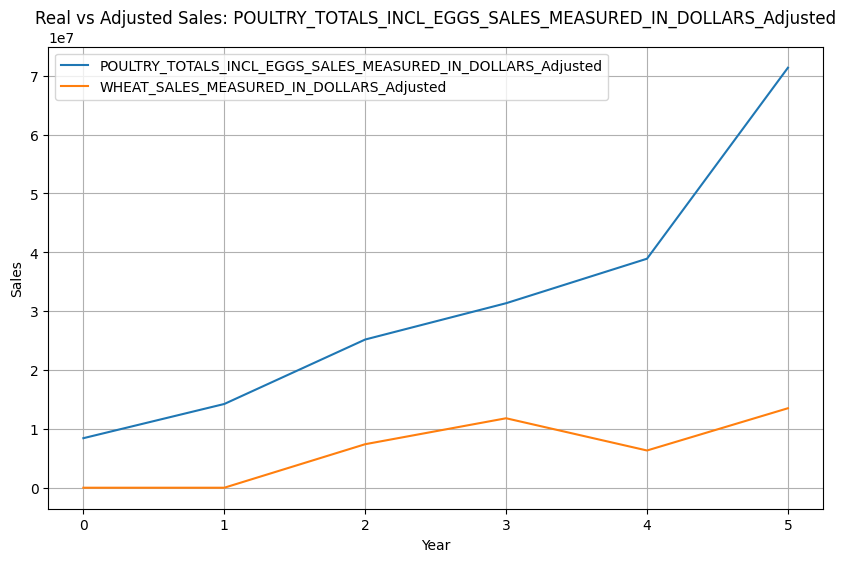

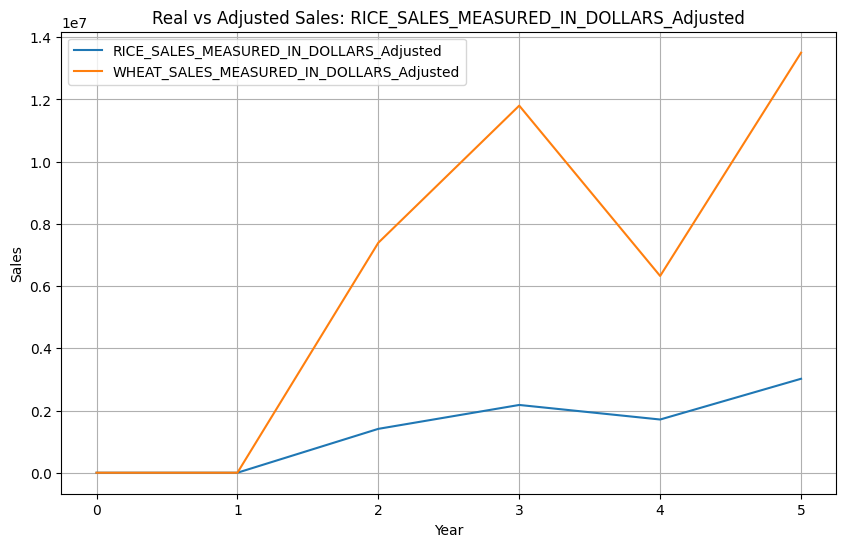

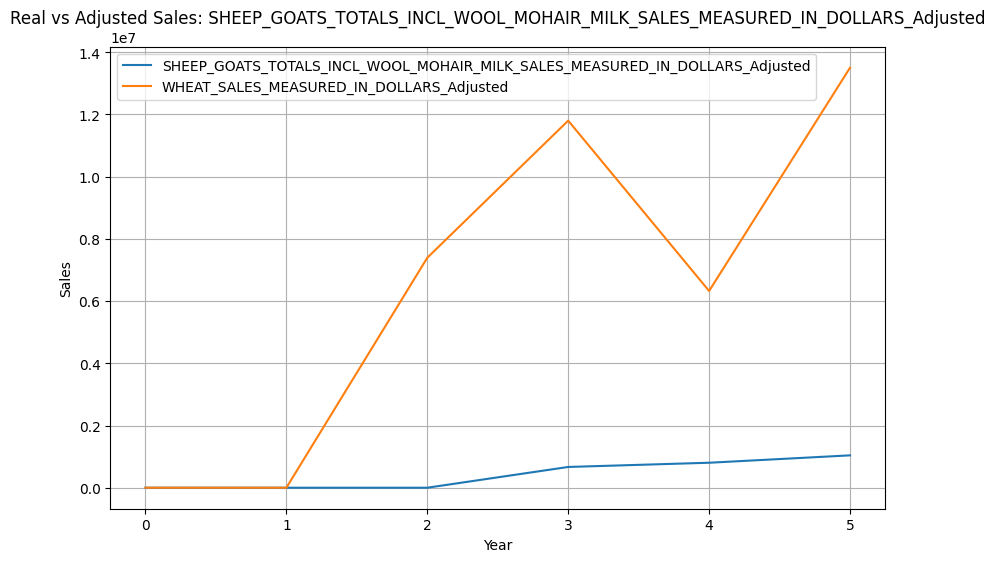

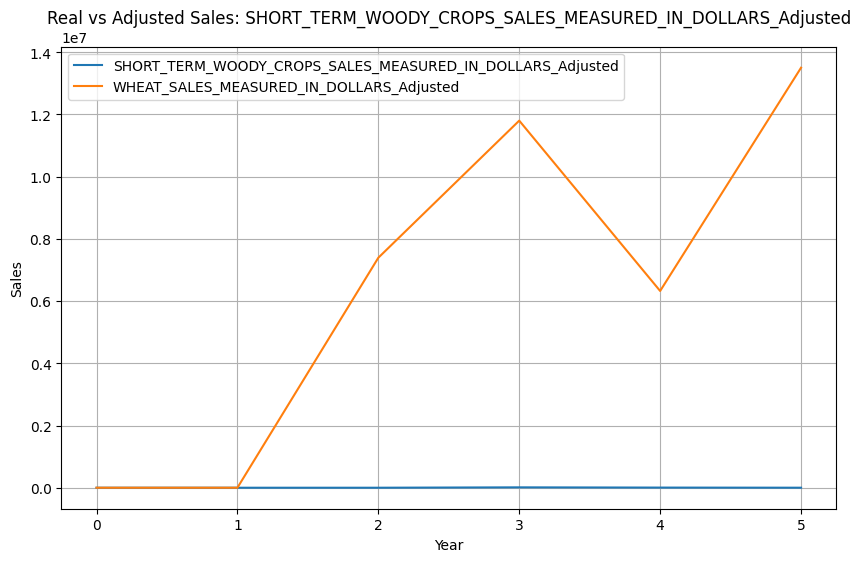

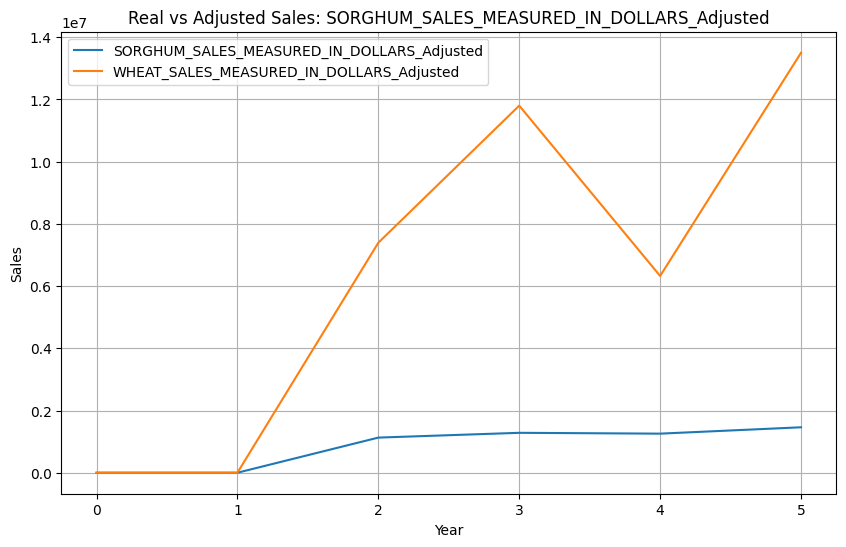

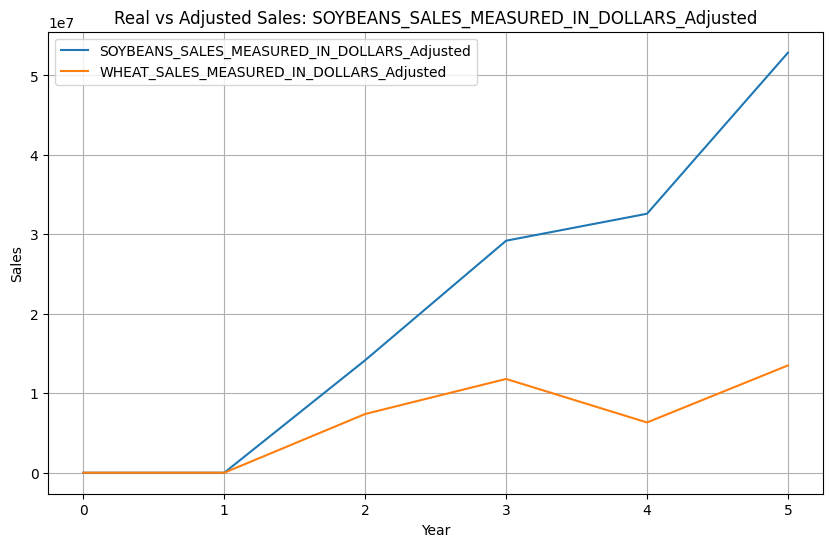

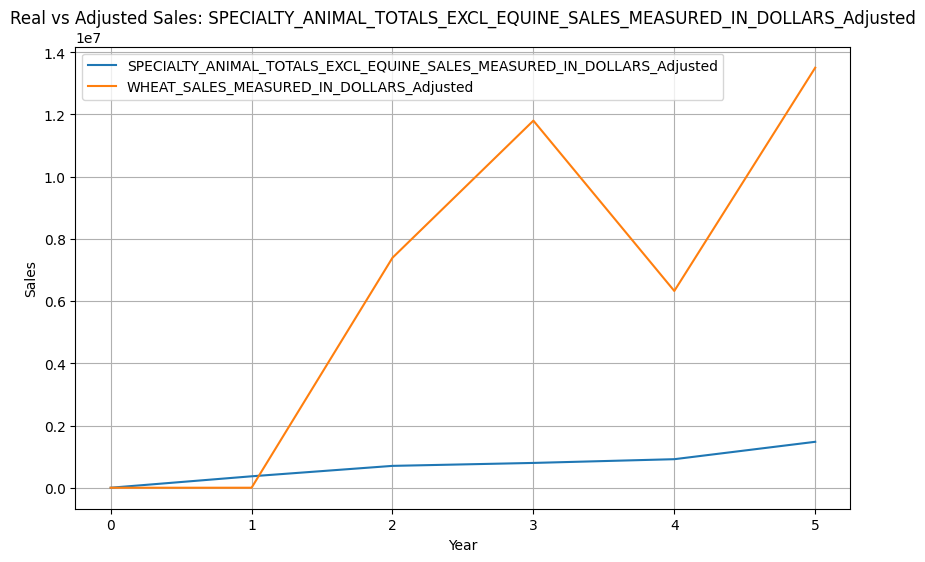

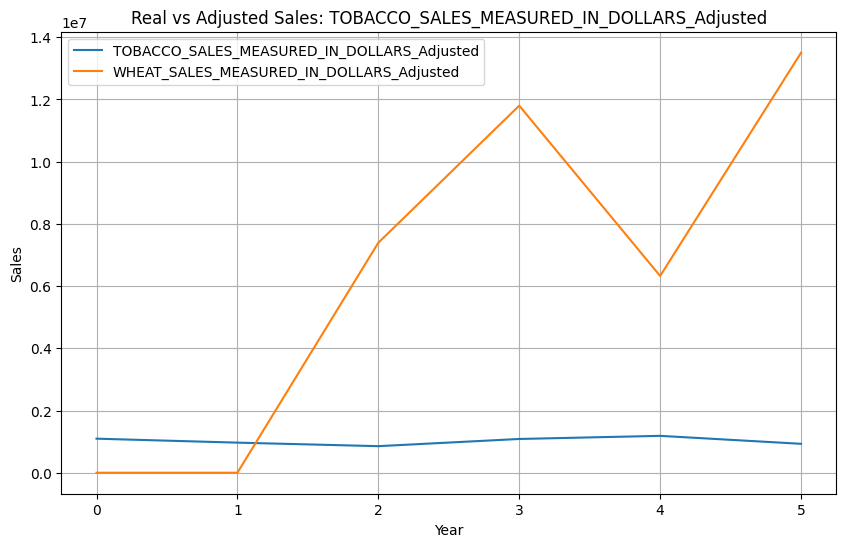

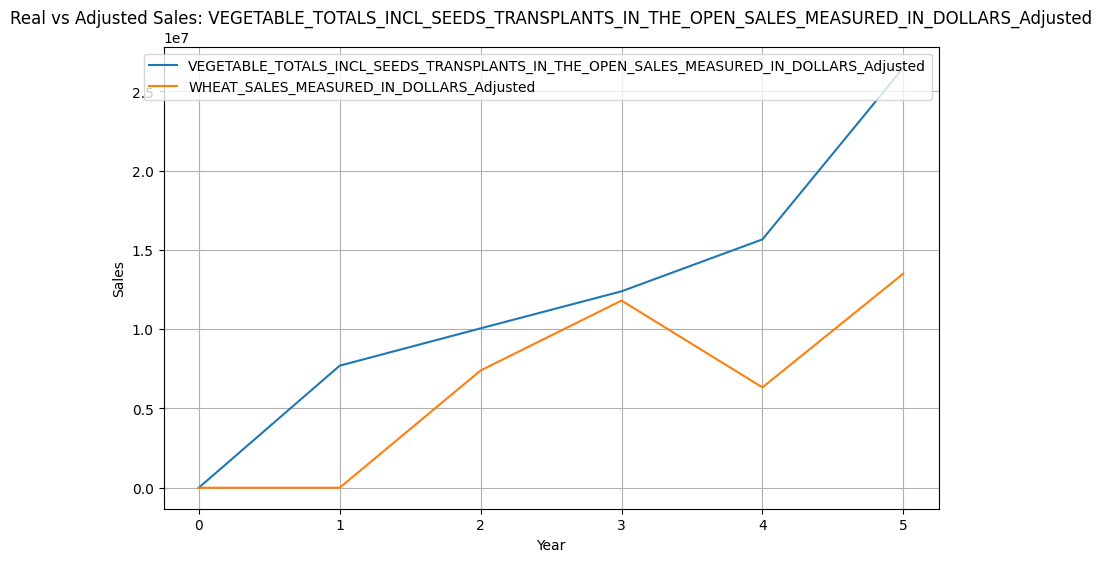

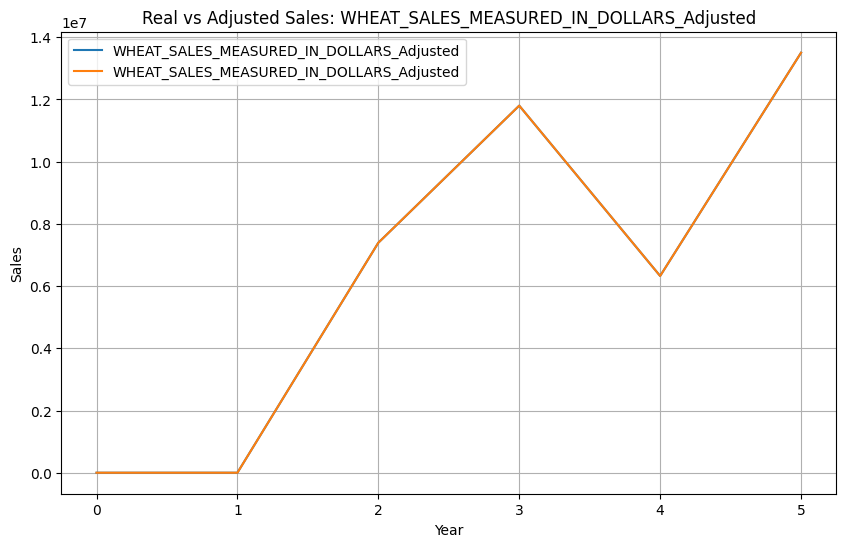

In [ ]:
import matplotlib.pyplot as plt

# Iterate through each sales column
for column in merged_df.columns:
  if 'MEASURED_IN_DOLLARS' in column and not column.endswith('_adjusted'): # Only process original sales columns
    # Create a new column name with "_Adjusted" suffix
    if not column.endswith('_Adjusted'):
      adjusted_column_name = column + "_Adjusted"

    # Create a figure and axes
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed

    # Plot the original sales and adjusted sales against the year
    plt.plot(merged_df.index, merged_df[column], label=column)
    plt.plot(merged_df.index, merged_df[adjusted_column_name], label=adjusted_column_name)

    # Customize the plot
    plt.title(f"Real vs Adjusted Sales: {column}")
    plt.xlabel("Year")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


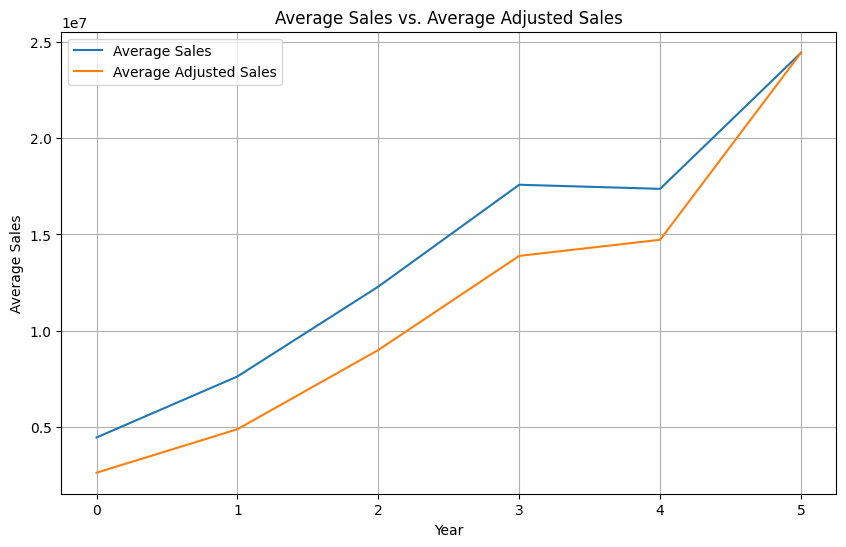

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined

# Create a new DataFrame to store the average of sales columns
average_sales_df = pd.DataFrame()

# Calculate the average of sales columns for both adjusted and non-adjusted
for column in merged_df.columns:
    if 'MEASURED_IN_DOLLARS' in column:
        if '_adjusted' in column.lower():  # Use column.lower() for case-insensitivity
            if 'average_adjusted_sales' not in average_sales_df.columns:
                average_sales_df['average_adjusted_sales'] = merged_df[column]
            else:
                average_sales_df['average_adjusted_sales'] += merged_df[column]
        else:
            if 'average_sales' not in average_sales_df.columns:
                average_sales_df['average_sales'] = merged_df[column]
            else:
                average_sales_df['average_sales'] += merged_df[column]

# Remove rows with 0 values in 'average_sales' only to keep adjusted sales
average_sales_df = average_sales_df[(average_sales_df['average_sales'] != 0)]


# Calculate the average across all sales columns
# Check if the column exists before calculating the average to avoid errors
if 'average_adjusted_sales' in average_sales_df.columns:
    average_sales_df['average_adjusted_sales'] = average_sales_df['average_adjusted_sales'] / merged_df.shape[1]
if 'average_sales' in average_sales_df.columns:
    average_sales_df['average_sales'] = average_sales_df['average_sales'] / merged_df.shape[1]


# Plot the average sales, check if columns exist before plotting
plt.figure(figsize=(10, 6))
if 'average_sales' in average_sales_df.columns:
    plt.plot(average_sales_df.index, average_sales_df['average_sales'], label='Average Sales')
if 'average_adjusted_sales' in average_sales_df.columns:
    plt.plot(average_sales_df.index, average_sales_df['average_adjusted_sales'], label='Average Adjusted Sales')

plt.title('Average Sales vs. Average Adjusted Sales')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.show()

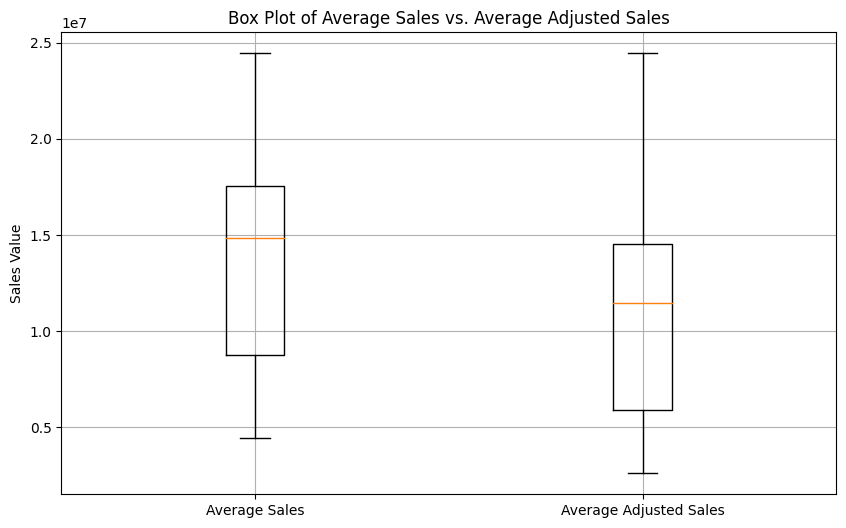

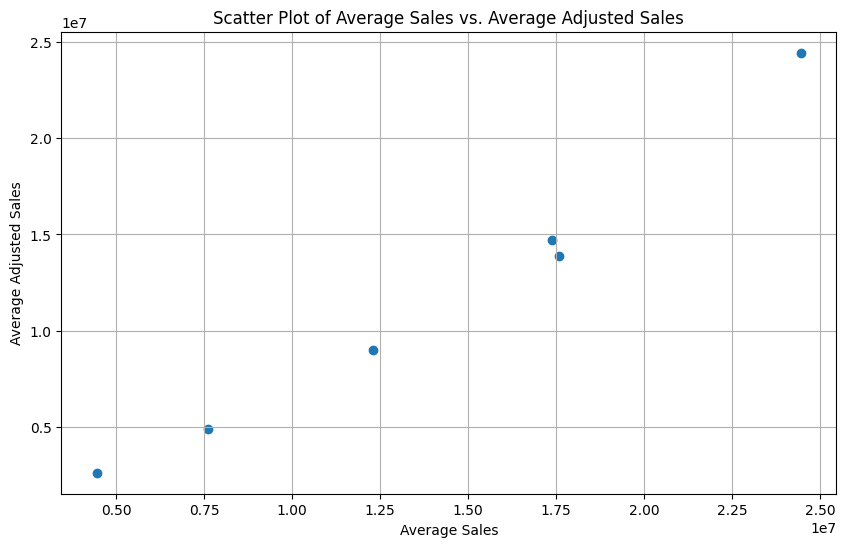

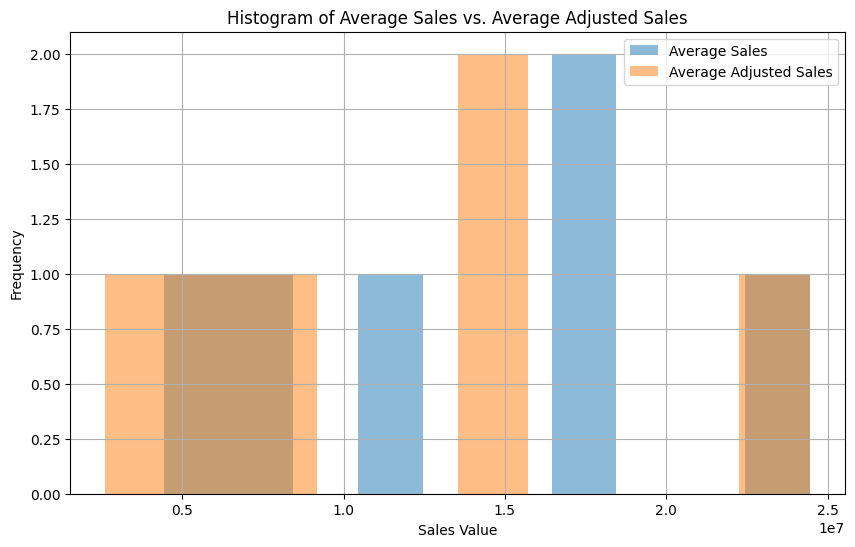

Correlation between average sales and average adjusted sales: 0.9878580907906517


In [ ]:
# prompt: create more staistical graphs for adjusted vs non adjusted values. do it only for avergae values across coluns, remove all 0

# Assuming average_sales_df is already defined and contains 'average_sales' and 'average_adjusted_sales' columns.

# Remove rows with 0 values
average_sales_df = average_sales_df[(average_sales_df != 0).all(axis=1)]


# Create a figure and axes for the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([average_sales_df['average_sales'], average_sales_df['average_adjusted_sales']], labels=['Average Sales', 'Average Adjusted Sales'])
plt.title('Box Plot of Average Sales vs. Average Adjusted Sales')
plt.ylabel('Sales Value')
plt.grid(True)
plt.show()


# Create a figure and axes for the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_sales_df['average_sales'], average_sales_df['average_adjusted_sales'])
plt.title('Scatter Plot of Average Sales vs. Average Adjusted Sales')
plt.xlabel('Average Sales')
plt.ylabel('Average Adjusted Sales')
plt.grid(True)
plt.show()


# Create a figure and axes for the histogram
plt.figure(figsize=(10, 6))
plt.hist(average_sales_df['average_sales'], bins=10, alpha=0.5, label='Average Sales')
plt.hist(average_sales_df['average_adjusted_sales'], bins=10, alpha=0.5, label='Average Adjusted Sales')
plt.title('Histogram of Average Sales vs. Average Adjusted Sales')
plt.xlabel('Sales Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# Calculate the correlation between average sales and average adjusted sales
correlation = average_sales_df['average_sales'].corr(average_sales_df['average_adjusted_sales'])
print(f"Correlation between average sales and average adjusted sales: {correlation}")


In [ ]:
# prompt: build a time series model to compare adjusted values with non adjusted sales values, exclude all 0s
%%capture
# Assuming average_sales_df is already defined and contains 'average_sales' and 'average_adjusted_sales' columns.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Instead of using merged_df, use average_sales_df which contains the calculated average columns
time_series_df = average_sales_df[['average_sales', 'average_adjusted_sales']]

# Remove rows with 0 values
time_series_df = time_series_df[(time_series_df != 0).all(axis=1)]

# Prepare data for time series modeling
data = time_series_df.values
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]


# Function to create time series dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    # Modified condition to handle smaller datasets
    # by ensuring there's at least one data point for testing
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)

        # Check if i + look_back is within bounds
        if i + look_back < len(dataset):
            Y.append(dataset[i + look_back, 0])
        else:
            # Handle edge case: use the last value if i + look_back exceeds dataset size
            Y.append(dataset[-1, 0])

    return np.array(X), np.array(Y)


# Create training and testing datasets with a look-back of 1
look_back = 1
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions back to original scale
trainPredict = scaler.inverse_transform(np.concatenate((trainPredict, np.zeros((len(trainPredict), 1))), axis=1))[:, 0]
trainY = scaler.inverse_transform(np.concatenate((trainY.reshape(-1, 1), np.zeros((len(trainY), 1))), axis=1))[:, 0]
testPredict = scaler.inverse_transform(np.concatenate((testPredict, np.zeros((len(testPredict), 1))), axis=1))[:, 0]
testY = scaler.inverse_transform(np.concatenate((testY.reshape(-1, 1), np.zeros((len(testY), 1))), axis=1))[:, 0]


# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))

testScore = np.sqrt(mean_squared_error(testY, testPredict))


# Shift train predictions for plotting
trainPredictPlot = np.empty_like(data[:, 0])
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(data[:, 0])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1] = testPredict

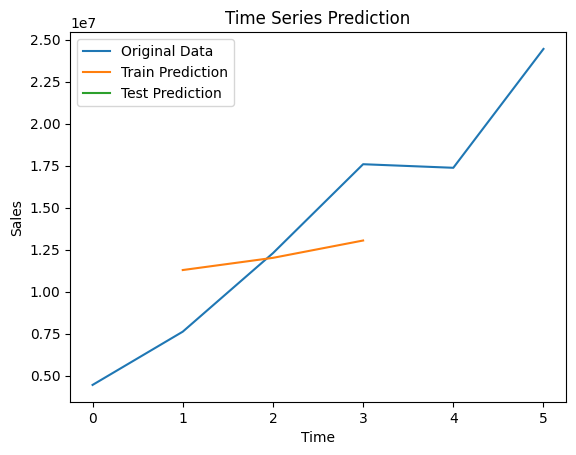

In [ ]:
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(data)[:, 0], label='Original Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.title('Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()